## Import Required Libraries

Our Aim in this project is to predict various Housing Price Through building ML model. Data is Stored in `train.csv` file. This data is obtained through Kaggle Competition. and can be found on kaggle by search "house-prices-advanced-regression-techniques".

In [132]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from ydata_profiling import ProfileReport

In [133]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [134]:
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,BaggingRegressor,AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [135]:
from sklearn.model_selection import RandomizedSearchCV

In [136]:
# ! pip install pandas-profiling
# !pip install ydata-profiling;
# above module is renamed as : !pip install ydata-profiling

In [137]:
import warnings
warnings.filterwarnings('ignore')

## Import DATA

In [138]:
data = pd.read_csv('train.csv',index_col =0)

In [139]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [141]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


## Cleaning DATA


we will first check columns having misssing values from train and test sets

In [142]:
# columns having missing values
missing_val_col = data.columns[(data.count() < data.shape[0])]
missing_val_col

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [143]:
data[missing_val_col].info()
# columns in test set but not in train set having missing values
# test_data[list(set(test_missing_val_col) - set(train_missing_val_col))].dtypes 


<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    588 non-null    object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null     obj

it is found from description that columns with datatype 'object' has no missing value. such columns are mostly categorical variables having one of category value as 'NA'. which is primary reason we get different value count but it does not mean missing data.

In [144]:
#columns in training data with missing numerical values 
data[missing_val_col[data[missing_val_col].dtypes != 'object']].info()
numeric_col = data[missing_val_col[data[missing_val_col].dtypes != 'object']].columns

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   MasVnrArea   1452 non-null   float64
 2   GarageYrBlt  1379 non-null   float64
dtypes: float64(3)
memory usage: 45.6 KB


In [145]:
data.loc[data['MasVnrArea'].isna(),['LotFrontage','MasVnrArea','MasVnrType','GarageType','GarageYrBlt']]

,LotFrontage,MasVnrArea,MasVnrType,GarageType,GarageYrBlt
Id,,,,,
235,NaN,NaN,NaN,BuiltIn,2002.0
530,NaN,NaN,NaN,Attchd,1975.0
651,65.0,NaN,NaN,Attchd,2007.0
937,67.0,NaN,NaN,Attchd,2003.0
974,95.0,NaN,NaN,Attchd,2007.0
978,35.0,NaN,NaN,Attchd,2007.0
1244,107.0,NaN,NaN,Attchd,2006.0
1279,75.0,NaN,NaN,Attchd,2002.0


from numerical value analysis it is found that 
1) 'LotFrontage' : Linear feet of street connected to property.
        'LotFrontage' = NaN represent there is no street connected to property means value can be assigned 0.
2) 'MasVnrArea' : Masonry veneer area in square feet.
        'MasVnrArea' has Nan value only coresponding to MasVnrType has 'NA' values so it also can be represent by 0.
   
3) 'GarageYrBlt' : year garage built.
        it is 'Nan' only where the 'GarageType' is 'NA' means no garage.

### replacing Nan values in Data

In [146]:
numeric_col = (data.columns[data.dtypes != 'object']) # shape (37,)

numeric_data = data[numeric_col].fillna(0)

non_numeric_col = list(set(data.columns) - set(numeric_col))
# data[list(non_numeric_col)].info()

categorical_col = ['GarageType', 'LotShape','Heating','Alley','Foundation','Exterior2nd','Condition1','MiscFeature',
                  'Street','LotConfig','MSZoning','Condition2','MasVnrType','Neighborhood','Exterior1st','RoofStyle',
                   'CentralAir','RoofMatl','Utilities']

ordinal_col = list(set(non_numeric_col) - set(categorical_col))
# ordinal_col

# total columns created will be = original num of total categories - categorical_columns(because we dropping first category) 
data[categorical_col].apply(lambda x : x.nunique()).sum() - len(categorical_col)

115

### Categorical encoded data

In [147]:
encoded_cat_data = pd.get_dummies(data[categorical_col],columns=categorical_col,sparse=True,drop_first=True)
# encoded_cat_data

In [148]:
le = LabelEncoder()
cat_label_encoded = data[categorical_col].apply(le.fit_transform)# used for tree based models
cat_label_encoded.head()

,GarageType,LotShape,Heating,Alley,Foundation,Exterior2nd,Condition1,MiscFeature,Street,LotConfig,MSZoning,Condition2,MasVnrType,Neighborhood,Exterior1st,RoofStyle,CentralAir,RoofMatl,Utilities
Id,,,,,,,,,,,,,,,,,,,
1,1,3,1,2,2,13,2,4,1,4,3,2,1,5,12,1,1,1,0
2,1,3,1,2,1,8,1,4,1,2,3,2,3,24,8,1,1,1,0
3,1,0,1,2,2,13,2,4,1,4,3,2,1,5,12,1,1,1,0
4,5,0,1,2,0,15,2,4,1,0,3,2,3,6,13,1,1,1,0
5,1,0,1,2,2,13,2,4,1,2,3,2,1,15,12,1,1,1,0


### Ordinal Encoded Data

In [149]:
# fillind nan value as a string value 'nan' so that later we can use as ordinal variable
encoded_ord_data = data[ordinal_col].fillna('nan') 
# encoded_ord_data

unique_val = {}
for item in ordinal_col:
    unique_val[item]= list(encoded_ord_data[item].unique())
    
# unique_val

In [150]:
# dictionary to map ordinal columns
ordinal_value_dict = {'HeatingQC' :{'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
                     'PavedDrive' : { 'Y':3, 'N':2, 'P':1},
                     'Functional':{'Typ':7, 'Min1':6, 'Maj1':3, 'Min2':5, 'Mod':4, 'Maj2':2, 'Sev':1},
                    'KitchenQual': {'Gd':4, 'TA':2, 'Ex':5, 'Fa':3},
                     'LandSlope' : {'Gtl':3, 'Mod':2, 'Sev':1 },
                     'SaleType' : {'WD':9, 'New':7, 'COD':6, 'ConLD':2, 'ConLI':3, 'CWD':8, 'ConLw':4, 'Con':5, 'Oth':1},
                     'LandContour' : {'Lvl':4, 'Bnk':3, 'Low':1, 'HLS':2},
                      'GarageQual' : {'TA':3, 'Fa':2, 'Gd':4, 'nan':0, 'Ex':5, 'Po':1},
                      'SaleCondition' : {'Normal':6, 'Abnorml':5, 'Partial':1, 'AdjLand':4, 'Alloca':3, 'Family':2},
                      'BsmtQual' : {'Gd':4, 'TA':3, 'Ex':5, 'nan':0, 'Fa':2},
                      'BsmtExposure' : {'No':1, 'Gd':5, 'Mn':2, 'Av':3, 'nan':0},
                      'BsmtFinType2' : {'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'nan':0, 'LwQ':2},
                      'GarageFinish' : {'RFn':2, 'Unf':1, 'Fin':3, 'nan':0},
                      'BldgType' : {'1Fam':1, '2fmCon':2, 'Duplex':3, 'TwnhsE':4, 'Twnhs':5},
                      'HouseStyle' : {'2Story':4, '1Story':1, '1.5Fin':3, '1.5Unf':2, 'SFoyer':7, 'SLvl':8, '2.5Unf':5, '2.5Fin':6},
                      'FireplaceQu' : {'nan' :0, 'TA':3, 'Gd':4, 'Fa':2, 'Ex':5, 'Po':1},
                      'PoolQC' : {'nan':0, 'Ex':5, 'Fa':2, 'Gd':4},
                      'BsmtCond' : {'TA':3, 'Gd':4, 'nan':0, 'Fa':2, 'Po':1},
                      'BsmtFinType1' : {'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'nan':0, 'LwQ':2},
                       'GarageCond' : {'TA':4, 'Fa':3, 'nan':0, 'Gd':5, 'Po':2, 'Ex':6},
                       'ExterQual' : {'Gd':4, 'TA':3, 'Ex':5, 'Fa':2},
                       'Fence' : {'nan':0, 'MnPrv':3, 'GdWo':2, 'GdPrv':4, 'MnWw':1},
                       'Electrical' : {'SBrkr':5, 'FuseF':3, 'FuseA':4, 'FuseP':2, 'Mix':1, 'nan':0},
                       'ExterCond' : {'TA':3, 'Gd':4, 'Fa':2, 'Po':1, 'Ex':5}
             
                     }

In [151]:
# mapping the ordinal columns according to dictionary made above
for key  in ordinal_value_dict:
    encoded_ord_data[key] =  encoded_ord_data[key].replace(ordinal_value_dict[key])
    

### combine numerical,categorical and ordinal columns in single dataframe

In [152]:
# prepared_data
# original data
# data.head()
prepared_data = pd.concat([numeric_data,encoded_cat_data,encoded_ord_data],axis=1)
prepared_data.head()

# prepared_data.to_csv('housing_price_prepared_data')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,PavedDrive,SaleCondition,HeatingQC,LandContour,LandSlope,Functional,BsmtExposure,GarageFinish,KitchenQual,GarageQual
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,3,6,5,4,3,7,1,2,4,3
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,3,6,5,4,3,7,5,2,2,3
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,3,6,5,4,3,7,2,2,4,3
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,3,5,4,4,3,7,1,1,4,3
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,3,6,5,4,3,7,3,2,4,3


## EDA(Exploratory Data Analysis)

This section is used  primarily for EDA and Feature Engineering. Previousely original data is available in `train.csv` and processed data from `train.csv` is stored in file `housing_file_prepared_data.csv`. 


we will use `train.csv` for EDA. same data will be used in tree based models in future. we will use `housing_file_prepared_data.csv` for various regressor in future.

* target column name is `SalePrice`

### Uni-variate analysis


* `numeric_col` : list of all numeric column in original data
* `non_numeric_col` : list of all non numeric column in original data

we can make one dataframe to visulize mean, variation, skewness and  kurtosis of numerical data.

for non numerical data we can plot and see its distribution.

In [153]:
# function that returns dataframe with summury of features with mean,variance,skewness,kurtosis
def univar_df(data,numeric_col):
    uni_variate_df ={}
    
    uni_variate_df['Mean'] = (round(data[numeric_col].mean(),2))
    uni_variate_df['Variance'] = (round(data[numeric_col].var(),2))
    uni_variate_df['Skewness'] = (round(data[numeric_col].skew(),2))
    uni_variate_df['Kurtosis'] = (round(data[numeric_col].kurt(),2))
    uni_variate_df = pd.DataFrame(uni_variate_df)
    return uni_variate_df

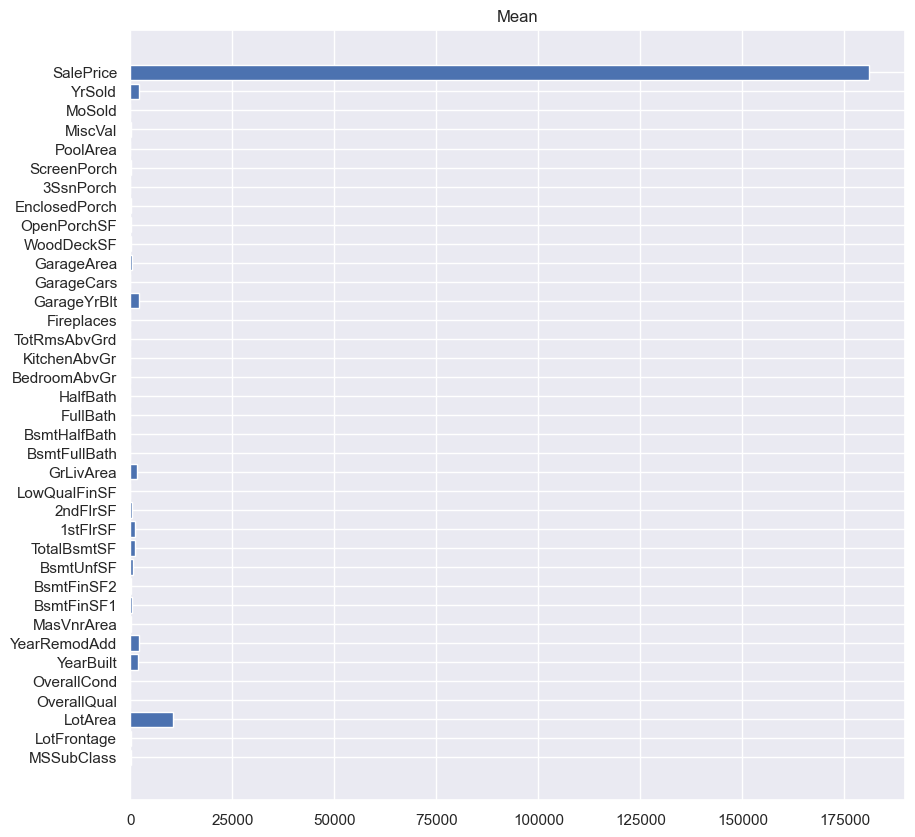

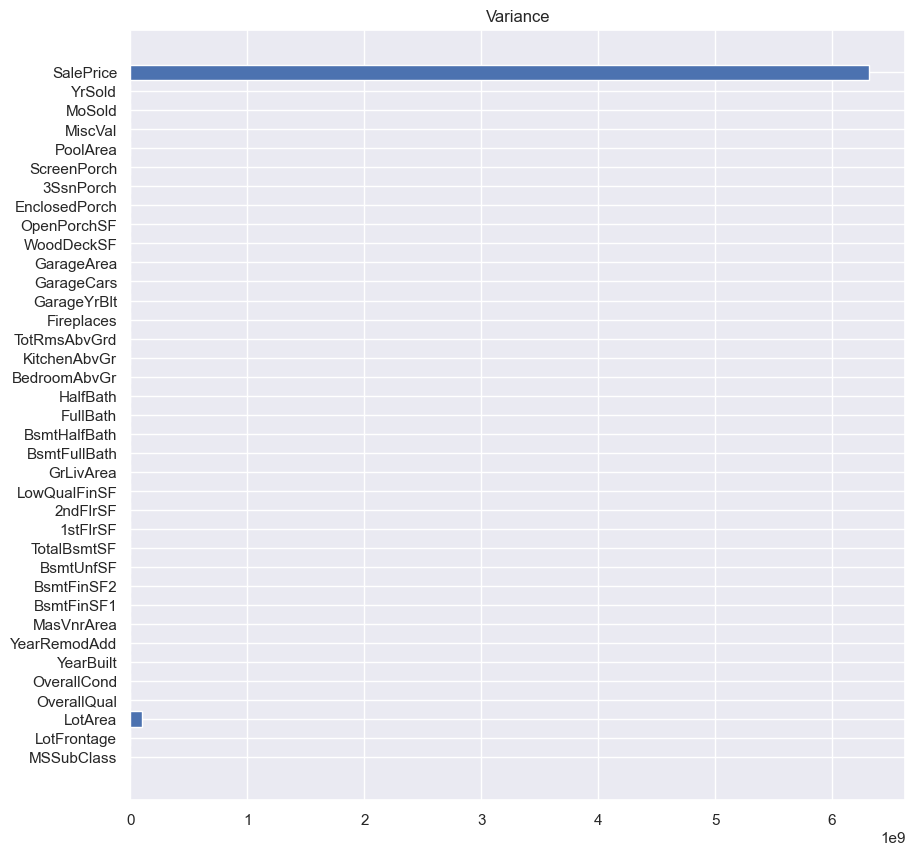

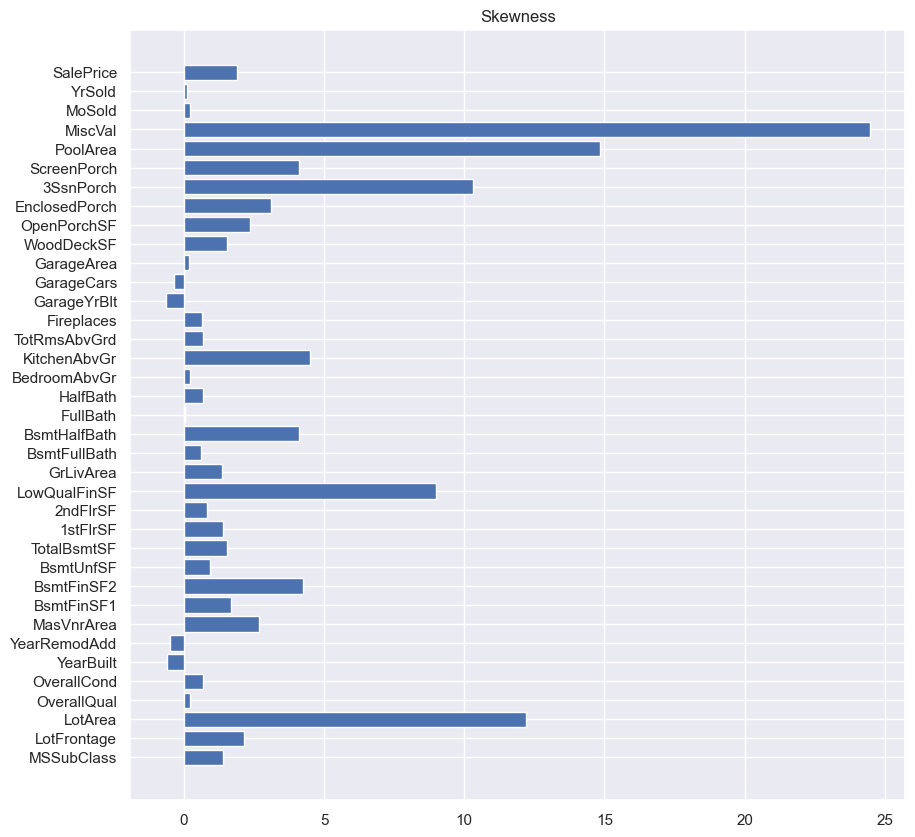

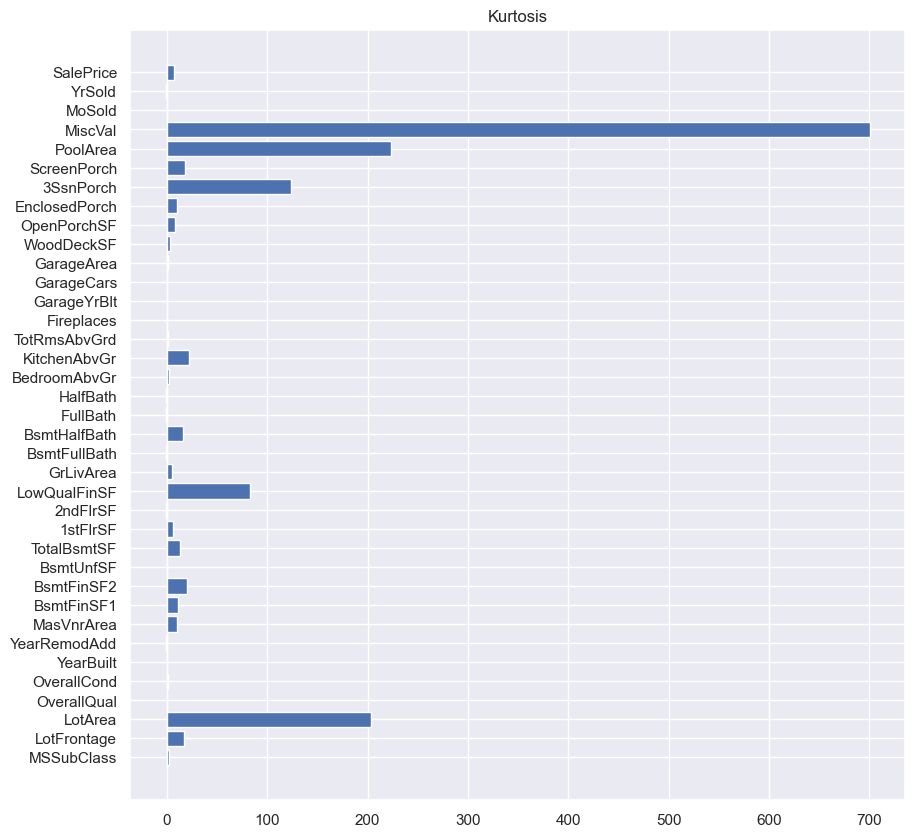

In [154]:
initial_data = univar_df(data,numeric_col)
for col in initial_data.columns:
    plt.figure(figsize = (10,10) )
    plt.barh(initial_data[col].index , initial_data[col])
    plt.title (col)
    plt.show()

we can see from above barcharts that many of Features in  data has `skewness` more than `1`.  

also many feature has `kurtosis` value more than `abs(3)` which makes data pron to outliers.

In [155]:
# visulizing above fact through distribution plotting of features
# for col in numeric_col:
#     plt.figure()
#     ax = sns.distplot(data[col])
#     plt.title(col)
    

we can transform our data to reduce `skewness` and then see the change throgh visulization.
we will  tranform data in prepared data.

In [156]:
# function to show distribution of variable and range
def show_distribution(dataframe,feature):
    for col in feature:
        fig , ax = plt.subplots(1,3);
        fig.set_size_inches(15,3);
        ax[0] = sns.boxplot(x=dataframe[col],ax =ax[0]);
        ax[0].set(title =  col);
        ax[1] = sns.distplot(dataframe[col],ax =ax[1]);
        ax[1].set(title = col);
        ax[2] = sns.scatterplot(x=dataframe[col] ,y= dataframe['SalePrice'],ax =ax[2]);
        ax[2].set(title = f'SalePrice vs {col}', xlabel = col , ylabel = 'SalePrice');
        plt.show();

In [157]:
# show_distribution(prepared_data,numeric_col)

### Tranforming features to make normal distibution 

In [158]:
# find total initially features with skewness with absolute value is more than 1
skewed_feat = [index for index,value in zip(initial_data.index,initial_data['Skewness']) if abs(value)>1]

Text(0.5, 1.0, 'Skewness After sqrt transformation')

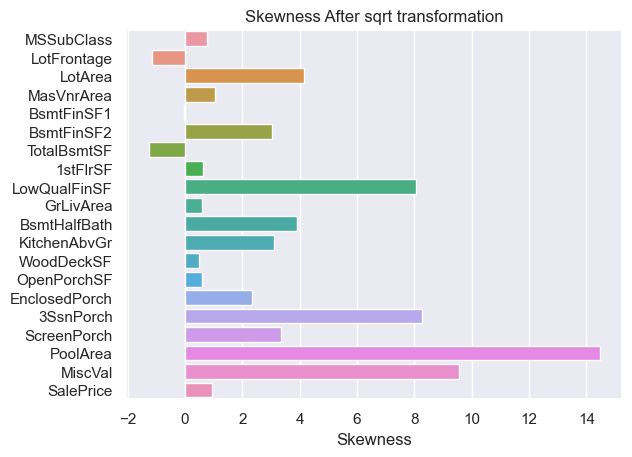

In [159]:
# we will apply boxcox transformation to numeric data to make it more normally distributed
# data contain '0' so box cox tranformation will not be applied we have to look for othe tranformation
transform_result ={}
for col in skewed_feat:
    transform_result[col]= np.sqrt(prepared_data[col])

# converting dictionary in to dataframe
tranform_df = pd.DataFrame(transform_result)
# tranform_df.head()

sqrt_tranformed_df = univar_df(tranform_df,tranform_df.columns)
sqrt_tranformed_df.head()

# feature with value of skewness is more than 1 after sqrt tranformatin
skewed_feat_after_sqrt =  [index for index,value in zip(sqrt_tranformed_df.index,sqrt_tranformed_df.Skewness) if abs(value)>1]

# skewed_feat_after_sqrt
sqrt_feat = list(set(skewed_feat) - set(skewed_feat_after_sqrt)) # sqrt is  usefull for this features

ax=sns.barplot(x=sqrt_tranformed_df['Skewness'],y = sqrt_tranformed_df.index,orient='h')
plt.title('Skewness After sqrt transformation')

Text(0.5, 1.0, 'Skewness after inverse hyperbolic sin Transformation')

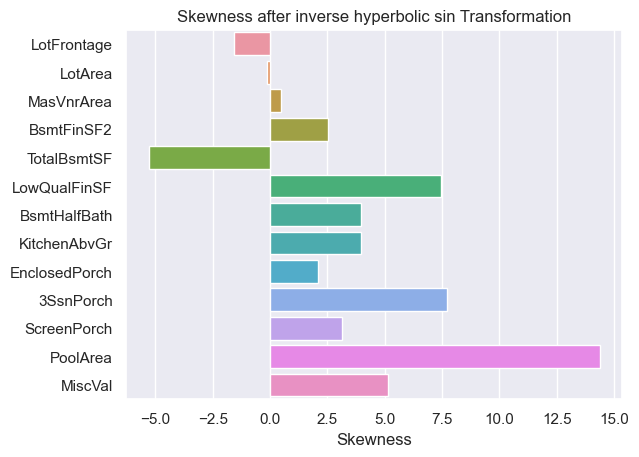

In [160]:
# inverse hyperbolic sin Transformation
transform_result ={}
for col in skewed_feat_after_sqrt:
    transform_result[col]= np.arcsinh(prepared_data[col])

# converting dictionary in to dataframe
tranform_df = pd.DataFrame(transform_result)
# tranform_df.head()

inv_sinh_tranformed_df = univar_df(tranform_df,tranform_df.columns)
# inv_sinh_tranformed_df.head()

# feature with value of skewness is more than 1 after sqrt tranformatin

skewed_feat_after_isinh =  [index for index,value in zip(inv_sinh_tranformed_df.index,inv_sinh_tranformed_df.Skewness) if abs(value)>1]
# skewed_feat_after_isinh

isinh_feat = list(set(skewed_feat_after_sqrt) - set(skewed_feat_after_isinh)) # iSinh is  usefull for this features
# isinh_feat

ax=sns.barplot(x=inv_sinh_tranformed_df['Skewness'],y = inv_sinh_tranformed_df.index,orient='h')
plt.title('Skewness after inverse hyperbolic sin Transformation')

Text(0.5, 1.0, 'Skewness After Log2 Transformation')

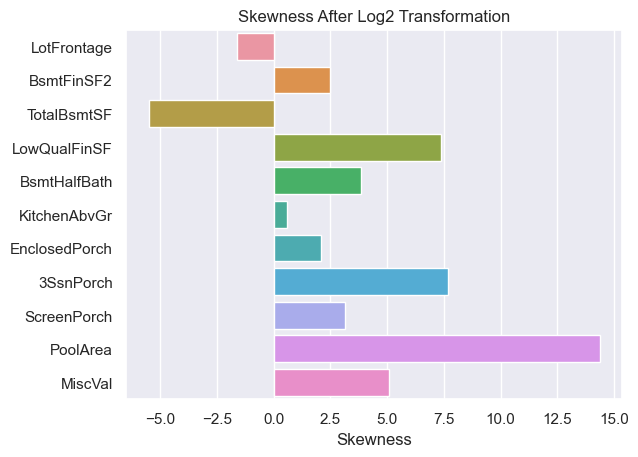

In [161]:
# log Transformation
# we will add small constant e.g.0.1 to tranform 0 to near 0 value to change distribution.
# This is to be done, to get rid of '0' 
transform_result ={}
for col in skewed_feat_after_isinh:
    transform_result[col]= np.log2(prepared_data[col]+0.1)
    # transform_result[col]= boxcox(prepared_data[col]+0.1,lmbda=-1)[0]
    

# converting dictionary in to dataframe
tranform_df = pd.DataFrame(transform_result)
# tranform_df.head()

log2_tranformed_df = univar_df(tranform_df,tranform_df.columns)
# log2_tranformed_df.head()


skewed_feat_after_log2 =  [index for index,value in zip(log2_tranformed_df.index,log2_tranformed_df.Skewness) if abs(value)>1]

log2_feat = list(set(skewed_feat_after_isinh) - set(skewed_feat_after_log2)) # Log2 is  usefull for this features
# log2_feat

ax=sns.barplot(x=log2_tranformed_df['Skewness'],y = log2_tranformed_df.index,orient='h')
plt.title('Skewness After Log2 Transformation')

In [162]:
# shows percentage value is '0'
prepared_data[skewed_feat_after_log2].eq(0).sum()/14.90


LotFrontage      17.382550
BsmtFinSF2       86.778523
TotalBsmtSF       2.483221
LowQualFinSF     96.241611
BsmtHalfBath     92.483221
EnclosedPorch    84.026846
3SsnPorch        96.375839
ScreenPorch      90.201342
PoolArea         97.516779
MiscVal          94.496644
dtype: float64

Above result shows that `skewed_feat_after_log2` shows
`out of above 10 features`,  `8 feature` has more than `85 %` value as `0`. 

if we decide to have this feature in model, we need to fix `0` value with appropriate value to proceed further.

for now we will proceed by keeping above 10 features same. and transform rest of features as per above information we get.

* we have `sqrt_feat` with column name for which `np.sqrt` tranform is usefull.
* we have `isinh_feat` with column name for which `np.arcsinh` tranform is usefull.
* we have `log2_feat` with column name for which `np.Log2` tranform is usefull.


In [163]:
prepared_data[sqrt_feat] = np.sqrt(prepared_data[sqrt_feat])
prepared_data[isinh_feat] = np.arcsinh(prepared_data[isinh_feat])
prepared_data[log2_feat] = np.log2(prepared_data[log2_feat]+0.1)

In [164]:
tranformed_data = univar_df(prepared_data,numeric_col)  
# tranformed_data

In [165]:
transform_feat = sqrt_feat + isinh_feat + log2_feat

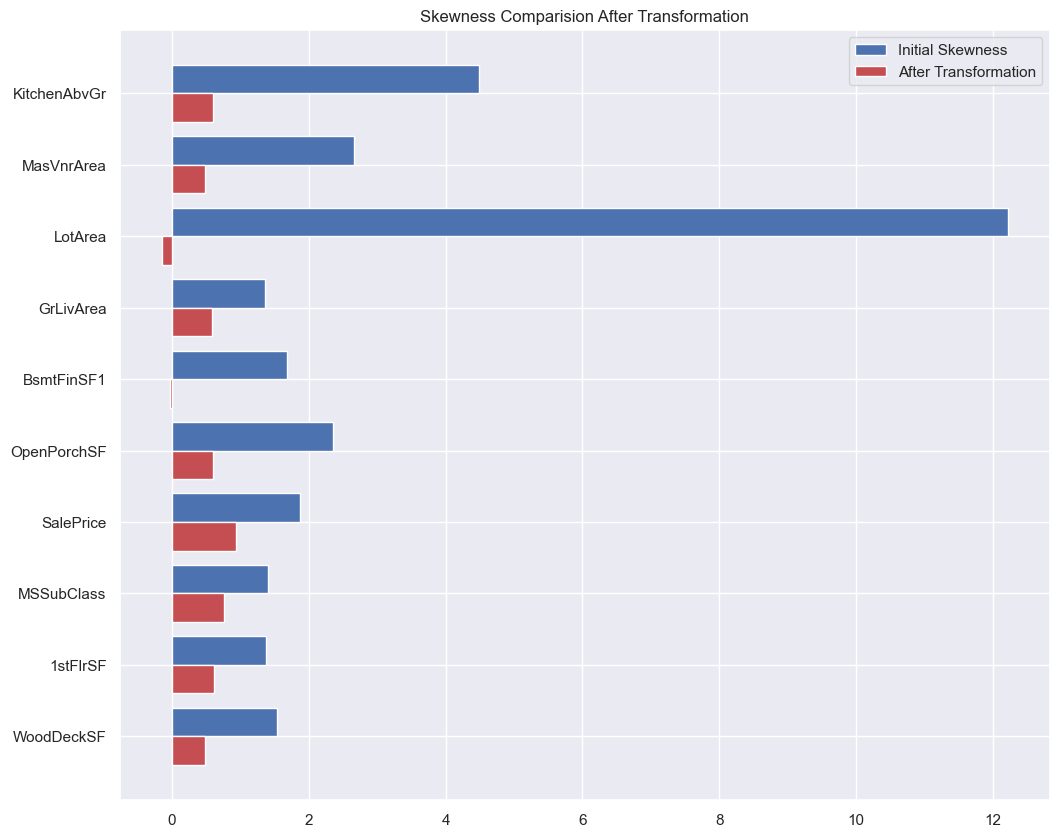

<Figure size 640x480 with 0 Axes>

In [166]:
# plotting skewness to visulize transformation effect
sns.set_style('darkgrid')
sns.set_context('notebook')
fig = plt.figure(figsize=(12,10))
ax = plt.subplot()
ax.barh(y=transform_feat , width =initial_data.loc[transform_feat,'Skewness'],
        height=0.4,
        align='edge',
        label = 'Initial Skewness',
        color = 'b');
ax.barh(y=transform_feat, width =tranformed_data.loc[transform_feat,'Skewness'],
        height=-0.4,
        align='edge',
        label = 'After Transformation',
        color = 'r');
ax.set(title = 'Skewness Comparision After Transformation')
plt.legend()
plt.show();
plt.tight_layout();

### Complete EDA of Data using Profilling Module

* we will make EDA report of data before processed and after processed in form of HTML file using pandas `profilling ` module

* command to install module : `pip install pandas-profiling `

* IN BELOW CELL REPORT IS GENERATED . SO ONLY UNCOMMENT IF IT REQUIRED TO OBTAIN DIFFERENT REPORT THAT ALREADY CREATED ONE. AND MAKE CHANGE ACCORDINGLY...

In [167]:
# we are using unscaled Data for reporting and EDA analysis



# data_report = ProfileReport(data , title = 'Initial Data')
# data_report.to_file("Initial_Data_EDA.html")

# processed_data_report = ProfileReport(prepared_data[numeric_col], title = 'Processed_Data')
# processed_data_report.to_file("Processed_Data_EDA.html")


## Scaling Data

In [168]:
rs=42

* `split` function is creted to make train_test split

In [169]:
def split(X_data,Y_data,size = 0.2):
    return train_test_split(X_data,Y_data,test_size=size,random_state=rs)

In [170]:
# prepared_data.head()
X = prepared_data.drop('SalePrice',axis =1)
y = prepared_data['SalePrice']
X.shape,y.shape

((1460, 175), (1460,))

In [171]:
X_train,X_test,y_train,y_test = split(X,y)

print("shape of X_train is" ,X_train.shape)
print("shape of X_test is" ,X_test.shape)
print("shape of y_train is" ,y_train.shape)
print("shape of y_test is" ,y_test.shape)

shape of X_train is (1168, 175)
shape of X_test is (292, 175)
shape of y_train is (1168,)
shape of y_test is (292,)


In [172]:
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

## Building Models

### Biuld usefull function

Below function used to plot distribution of actual and fitted(Predicted) value.

In [173]:
def prediction_dist(actual,predicted,model):
    plt.figure(figsize=(4,4))
    ax1 = sns.distplot(actual,color = 'green',hist = False ,label = 'Actual Value')
    sns.distplot(predicted,color = 'red', hist = False,label = 'Prediction Value',ax=ax1)
    ax1.set(title = 'Actual vs Predicted , model ='+ str(model) )
    plt.legend()
    plt.show()

In [174]:
def prediction_scatter(actual,predicted,model):
    plt.figure(figsize=(4,4))
    ax= sns.scatterplot(x= actual,y = predicted,color = 'red')
    ax.set(title = 'Actual vs Predicted , model ='+ str(model),
           xlabel = 'Actual Value',
          ylabel = 'Prediction')
    plt.show()

Below Function return dataframe of parameter and Scoring item provided for specific grid search. which can be later used as to vizulise how error matric change with respect to parameter.

In [175]:
def df_result(search,list):

    result = []
    for item in range(len(list)):
        result.append(pd.Series(search.cv_results_[list[item]],name = list[item].split('_')[-1]))

    return pd.DataFrame(result).T

In [176]:
# return R2 and RMSE for train and test set in dataframe
def best_model_metrics(X_trn,X_tst,y_trn,y_tst,model):
    metrics ={
        'R2' : [r2_score(y_trn,model.predict(X_trn)),r2_score(y_tst,model.predict(X_tst))],
        'RMSE' : [np.sqrt(mean_squared_error(y_trn,model.predict(X_trn))),
                  np.sqrt(mean_squared_error(y_tst,model.predict(X_tst)))]
    }
    return pd.DataFrame(metrics,index = ['Train' , 'Test'])

### Linear regression

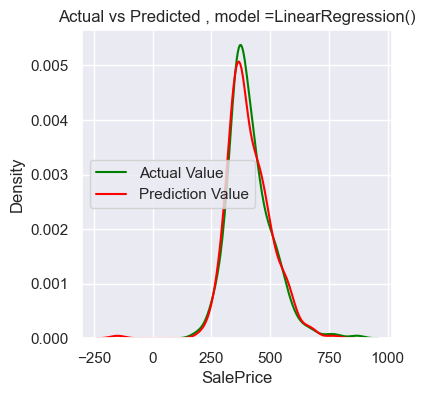

R2 score of LinearRegression() model on train set: 0.9383105534923066 
R2 score of LinearRegression() model on test set: 0.7584871150951774 
Mean Squred Error  of LinearRegression() model on Train set: 433.9218258576863
Mean Squred Errorof  LinearRegression() model : 2077.099695246137 


In [177]:
# Linear Regression model
# fitting Model on Non Scaled Data
lr = LinearRegression()
lr.fit(X_train,y_train) 
lr_predict = lr.predict(X_test)

prediction_dist(y_test,lr_predict,lr)
print(f'R2 score of {lr} model on train set: {r2_score(y_train,lr.predict(X_train))} ')
print(f'R2 score of {lr} model on test set: {r2_score(y_test,lr.predict(X_test))} ')
print(f'Mean Squred Error  of {lr} model on Train set: {mean_squared_error(y_train,lr.predict(X_train)) }')
print(f'Mean Squred Errorof  {lr} model : {mean_squared_error(y_test,lr.predict(X_test))} ')
lr_metric = best_model_metrics(X_train,X_test,y_train,y_test,lr)

In [178]:
lr_metric

,R2,RMSE
Train,0.938311,20.830790
Test,0.758487,45.575209


### Ridge

In [179]:
# ridge(L2 regularization)
# rdg = Ridge(alpha=1.0,random_state=rs)

rdg_input = [('polyfeat',PolynomialFeatures(degree=2)),('ss',StandardScaler()) , ('model',Ridge(alpha=0.1,random_state=rs,max_iter=10000))]
rdg_pipe = Pipeline(rdg_input)
rdg_pipe.fit(X_train,y_train)
rdg_predict = rdg_pipe.predict(X_test)

rdg_param = {
    "model__alpha" : [6800,6825,6850,6875,6900,6925,6950,6975,7000,7100]
}

scorer = {
    'r2' : 'r2',
    'nmse':'neg_mean_squared_error'
}
rdg_search = GridSearchCV(rdg_pipe,param_grid=rdg_param,n_jobs=-1,scoring=scorer,refit='nmse')
rdg_search.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('polyfeat', PolynomialFeatures()),
                                       ('ss', StandardScaler()),
                                       ('model',
                                        Ridge(alpha=0.1, max_iter=10000,
                                              random_state=42))]),
             n_jobs=-1,
             param_grid={'model__alpha': [6800, 6825, 6850, 6875, 6900, 6925,
                                          6950, 6975, 7000, 7100]},
             refit='nmse',
             scoring={'nmse': 'neg_mean_squared_error', 'r2': 'r2'})

In [180]:
# print(rdg_search.cv_results_.keys())
rdg_result = df_result(rdg_search,['param_model__alpha','mean_test_nmse','mean_test_r2'])
rdg_result

,alpha,nmse,r2
0,6800.0,-1026.384017,0.857836
1,6825.0,-1026.381437,0.857835
2,6850.0,-1026.379496,0.857834
3,6875.0,-1026.378187,0.857832
4,6900.0,-1026.377503,0.857831
5,6925.0,-1026.377438,0.857829
6,6950.0,-1026.377986,0.857828
7,6975.0,-1026.379141,0.857826
8,7000.0,-1026.380896,0.857824
9,7100.0,-1026.393803,0.857816


In [181]:
rdg_search.best_estimator_,rdg_search.best_score_

(Pipeline(steps=[('polyfeat', PolynomialFeatures()), ('ss', StandardScaler()),
                 ('model', Ridge(alpha=6925, max_iter=10000, random_state=42))]),
 -1026.3774379335894)

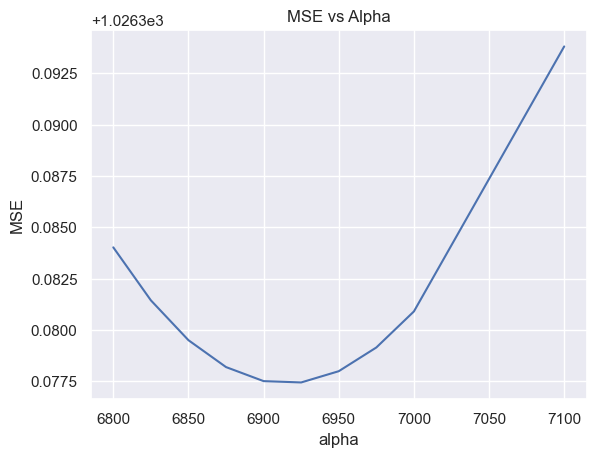

In [182]:

sns.set_theme()
plt.figure()
ax = sns.lineplot(x=rdg_result['alpha'] , y = -rdg_result['nmse'])
ax.set(title = 'MSE vs Alpha',ylabel='MSE')
plt.show()

In [183]:
best_rdg = rdg_search.best_estimator_
# best_rdg_predict = best_rdg.predict(X_test)

best_rdg_metric = best_model_metrics(X_train,X_test,y_train,y_test,best_rdg)
best_rdg_metric


,R2,RMSE
Train,0.958283,17.129932
Test,0.911381,27.607201


In [184]:
# print(r2_score(y_train,best_rdg.predict(X_train)))
# print(r2_score(y_test,best_rdg.predict(X_test)))


### Lasso

In [185]:
las_input = [('polyfeat',PolynomialFeatures(degree=1)),('ss',StandardScaler()) , ('model',Lasso(alpha=0.1,random_state=rs,max_iter=10000))]
las_pipe = Pipeline(las_input)
las_pipe.fit(X_train,y_train)
las_predict = las_pipe.predict(X_test)

las_param = {
    "model__alpha" : [0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,2.5,3]
}

scorer = {
    'r2' : 'r2',
    'nmse':'neg_mean_squared_error'
}
las_search = GridSearchCV(las_pipe, param_grid=las_param, n_jobs=-1 , scoring=scorer, refit='nmse')
las_search.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('polyfeat',
                                        PolynomialFeatures(degree=1)),
                                       ('ss', StandardScaler()),
                                       ('model',
                                        Lasso(alpha=0.1, max_iter=10000,
                                              random_state=42))]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                          0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3,
                                          1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.5,
                                          3]},
             refit='nmse',
             scoring={'nmse': 'neg_mean_squared_error', 'r2': 'r2'})

In [186]:
las_result = df_result(las_search,['param_model__alpha','mean_test_nmse','mean_test_r2'])
las_result

,alpha,nmse,r2
0,0.001,-2029.407550,0.702688
1,0.010,-1987.851297,0.709035
2,0.100,-1649.216173,0.760703
3,0.200,-1441.932391,0.793292
4,0.300,-1306.636455,0.814416
5,0.400,-1202.556225,0.830458
6,0.500,-1135.307971,0.840802
7,0.600,-1096.746976,0.846711
8,0.700,-1063.119228,0.851746
9,0.800,-1041.549092,0.854872


Pipeline(steps=[('polyfeat', PolynomialFeatures(degree=1)),
                ('ss', StandardScaler()),
                ('model', Lasso(alpha=1.4, max_iter=10000, random_state=42))]) -1023.0961978403739


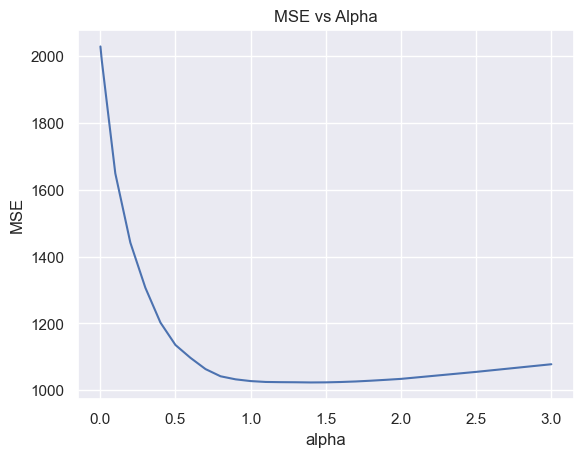

In [187]:
print(las_search.best_estimator_,las_search.best_score_)
sns.set_theme()
plt.figure()
ax = sns.lineplot(x=las_result['alpha'] , y = -las_result['nmse'])
ax.set(title = 'MSE vs Alpha',ylabel='MSE')
plt.show();

In [188]:
best_las = las_search.best_estimator_
print(las_search.best_params_)
# best_rdg_predict = best_rdg.predict(X_test)

best_las_metric = best_model_metrics(X_train,X_test,y_train,y_test,best_las)
best_las_metric

{'model__alpha': 1.4}


,R2,RMSE
Train,0.899894,26.535645
Test,0.905950,28.440521


### Elastic_net

In [189]:
enet_input = [('polyfeat',PolynomialFeatures(degree=1)),('ss',StandardScaler()) , ('model',ElasticNet(alpha=0.1,l1_ratio=0.5,random_state=rs,max_iter=10000))]
enet_pipe = Pipeline(enet_input)
enet_pipe.fit(X_train,y_train)
enet_predict = enet_pipe.predict(X_test)

enet_param = {
    "model__alpha" : [0.01,0.1,1,1.05,1.055,1.06,1.065,1.07,1.08,2],
    "model__l1_ratio" : [0.76,0.77,0.78,0.79,0.80]
}

scorer = {
    'r2' : 'r2',
    'nmse':'neg_mean_squared_error'
}
enet_search = GridSearchCV(enet_pipe, param_grid=enet_param, n_jobs=-1 , scoring=scorer, refit='nmse')
enet_search.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('polyfeat',
                                        PolynomialFeatures(degree=1)),
                                       ('ss', StandardScaler()),
                                       ('model',
                                        ElasticNet(alpha=0.1, max_iter=10000,
                                                   random_state=42))]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.01, 0.1, 1, 1.05, 1.055, 1.06,
                                          1.065, 1.07, 1.08, 2],
                         'model__l1_ratio': [0.76, 0.77, 0.78, 0.79, 0.8]},
             refit='nmse',
             scoring={'nmse': 'neg_mean_squared_error', 'r2': 'r2'})

In [190]:
enet_result = df_result(enet_search,['param_model__alpha','mean_test_nmse','mean_test_r2'])
enet_result

,alpha,nmse,r2
0,0.010,-1674.098154,0.758442
1,0.010,-1683.119621,0.757024
2,0.010,-1692.337292,0.755574
3,0.010,-1701.828828,0.754081
4,0.010,-1711.605743,0.752542
5,0.100,-1165.366061,0.836993
6,0.100,-1169.618006,0.836351
7,0.100,-1174.174262,0.835662
8,0.100,-1179.055934,0.834924
9,0.100,-1184.307749,0.834127


Pipeline(steps=[('polyfeat', PolynomialFeatures(degree=1)),
                ('ss', StandardScaler()),
                ('model',
                 ElasticNet(alpha=1.065, l1_ratio=0.78, max_iter=10000,
                            random_state=42))]) -987.7446948886509


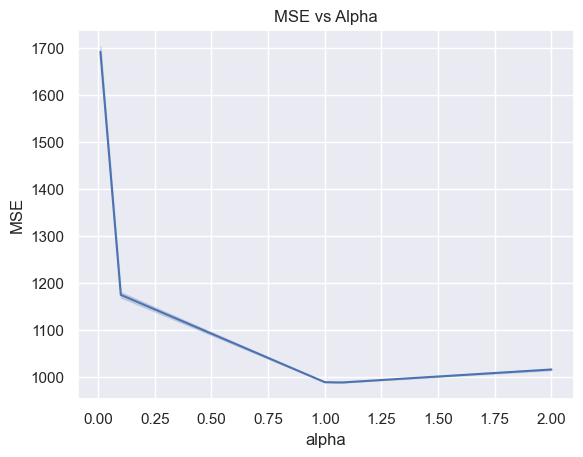

In [191]:
print(enet_search.best_estimator_,enet_search.best_score_)
sns.set_theme()
plt.figure()
ax = sns.lineplot(x=enet_result['alpha'] , y = -enet_result['nmse'])
ax.set(title = 'MSE vs Alpha',ylabel='MSE')
plt.show();

In [192]:
best_enet = enet_search.best_estimator_
print(enet_search.best_params_)
# best_rdg_predict = best_rdg.predict(X_test)

best_enet_metric = best_model_metrics(X_train,X_test,y_train,y_test,best_enet)
best_enet_metric

{'model__alpha': 1.065, 'model__l1_ratio': 0.78}


,R2,RMSE
Train,0.900541,26.449744
Test,0.901220,29.147011


### Supprt Vector Regressor (SVR)

In [193]:

svr_input = [('polyfeat',PolynomialFeatures(degree=1)),
             ('ss',StandardScaler()) ,
             ('model',LinearSVR(C=1.0,random_state=rs,max_iter=10000))]
svr_pipe = Pipeline(svr_input)
svr_pipe.fit(X_train,y_train)
svr_predict = svr_pipe.predict(X_test)

svr_param = {
    "model__C" : [1,1.1,1.2,1.3,1.4,1.5,1.55,1.6,1.68,1.69,1.695,1.7,1.71,1.75,1.8,1.85,1.9,2,2.5,3,4,5]
}

scorer = {
    'r2' : 'r2',
    'nmse':'neg_mean_squared_error'
}
svr_search = GridSearchCV(svr_pipe, param_grid=svr_param, n_jobs=-1 , scoring=scorer, refit='r2')
svr_search.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('polyfeat',
                                        PolynomialFeatures(degree=1)),
                                       ('ss', StandardScaler()),
                                       ('model',
                                        LinearSVR(max_iter=10000,
                                                  random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.55, 1.6,
                                      1.68, 1.69, 1.695, 1.7, 1.71, 1.75, 1.8,
                                      1.85, 1.9, 2, 2.5, 3, 4, 5]},
             refit='r2',
             scoring={'nmse': 'neg_mean_squared_error', 'r2': 'r2'})

In [194]:
svr_result = df_result(svr_search,['param_model__C','mean_test_nmse','mean_test_r2'])
svr_result

,C,nmse,r2
0,1.000,-1207.569418,0.828301
1,1.100,-1124.783792,0.841407
2,1.200,-1090.803503,0.847206
3,1.300,-1079.481414,0.849012
4,1.400,-1073.373969,0.849866
5,1.500,-1072.052186,0.850141
6,1.550,-1069.106151,0.850590
7,1.600,-1068.629309,0.850606
8,1.680,-1069.311147,0.850627
9,1.690,-1069.132069,0.850659


{'model__C': 1.695} 0.8506866781766826


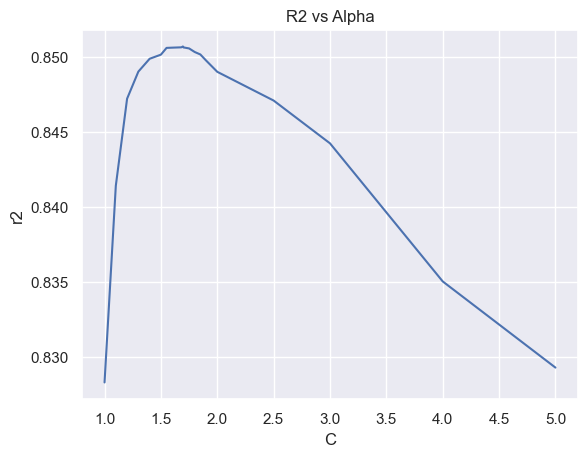

In [195]:
print(svr_search.best_params_,svr_search.best_score_)
sns.set_theme()
plt.figure()
ax = sns.lineplot(x=svr_result['C'] , y = svr_result['r2'])
ax.set(title = 'R2 vs Alpha',ylabel='r2')
plt.show();

In [196]:
best_svr = svr_search.best_estimator_
print(svr_search.best_params_)
# best_rdg_predict = best_rdg.predict(X_test)

best_svr_metric = best_model_metrics(X_train,X_test,y_train,y_test,best_svr)
best_svr_metric

{'model__C': 1.695}


,R2,RMSE
Train,0.897160,26.895567
Test,0.905188,28.555540


### Scaling Insensitive models

In [197]:
data_for_tree_based =pd.concat([numeric_data,cat_label_encoded,encoded_ord_data],axis=1)
data_for_tree_based.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,PavedDrive,SaleCondition,HeatingQC,LandContour,LandSlope,Functional,BsmtExposure,GarageFinish,KitchenQual,GarageQual
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,3,6,5,4,3,7,1,2,4,3
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,3,6,5,4,3,7,5,2,2,3
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,3,6,5,4,3,7,2,2,4,3
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,3,5,4,4,3,7,1,1,4,3
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,3,6,5,4,3,7,3,2,4,3


In [198]:
X_treeBased = data_for_tree_based.drop('SalePrice',axis = 1)
y_treeBased = data_for_tree_based['SalePrice']
X_treeBased.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,PavedDrive,SaleCondition,HeatingQC,LandContour,LandSlope,Functional,BsmtExposure,GarageFinish,KitchenQual,GarageQual
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,3,6,5,4,3,7,1,2,4,3
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,3,6,5,4,3,7,5,2,2,3
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,3,6,5,4,3,7,2,2,4,3
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,3,5,4,4,3,7,1,1,4,3
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,3,6,5,4,3,7,3,2,4,3


In [199]:
TX_train,TX_test,Ty_train,Ty_test = split(X_treeBased,y_treeBased)

### Decision Tree

In [200]:
DT = DecisionTreeRegressor(max_depth=10,random_state=rs)
DT.fit(TX_train,Ty_train)
DT.predict(TX_test)

DT_param = {
    'criterion': ["squared_error"],
    'max_depth': [4,3,5,6,7,8,9, 10,20],
    'min_samples_leaf': [1,2,3,4,5,6,7],
    'min_samples_split': [10,20,30]
}

scorer = {
    'r2' : 'r2',
    'nmse':'neg_mean_squared_error'
}
DT_search = GridSearchCV(DT, param_grid=DT_param, n_jobs=-1 , scoring=scorer, refit='r2')
DT_search.fit(TX_train,Ty_train.values.ravel())

GridSearchCV(estimator=DecisionTreeRegressor(max_depth=10, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [4, 3, 5, 6, 7, 8, 9, 10, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [10, 20, 30]},
             refit='r2',
             scoring={'nmse': 'neg_mean_squared_error', 'r2': 'r2'})

In [201]:
DT_result = df_result(DT_search,
                      ['param_min_samples_leaf','param_criterion','param_max_depth','mean_test_nmse','mean_test_r2'])
DT_result

,leaf,criterion,depth,nmse,r2
0,1,squared_error,4,-2170593978.388872,0.63618
1,1,squared_error,4,-2170593978.388872,0.63618
2,1,squared_error,4,-1989280771.70611,0.661062
3,2,squared_error,4,-1991755282.892116,0.659682
4,2,squared_error,4,-1991755282.892116,0.659682
...,...,...,...,...,...
184,6,squared_error,20,-1493668725.24684,0.747866
185,6,squared_error,20,-1609622877.787247,0.730656
186,7,squared_error,20,-1617230958.016977,0.729295
187,7,squared_error,20,-1583863988.353845,0.734693


{'criterion': 'squared_error', 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 20} 0.7542622770817853


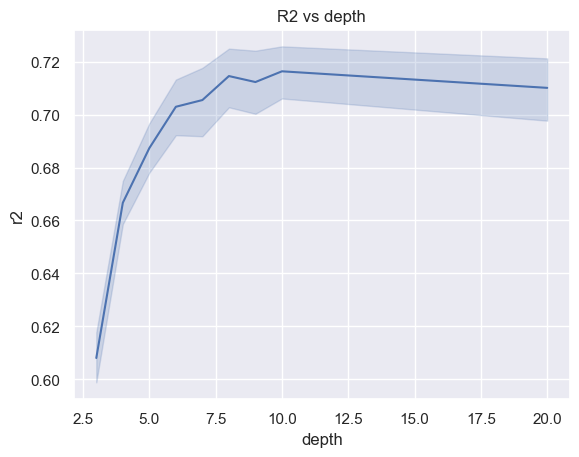

In [202]:
print(DT_search.best_params_,DT_search.best_score_)
sns.set_theme()
plt.figure()
ax = sns.lineplot(x=DT_result['depth'] , y = DT_result['r2'])
ax.set(title = 'R2 vs depth',ylabel='r2')
plt.show();

In [203]:
best_DT = DT_search.best_estimator_
print(DT_search.best_params_)
# best_rdg_predict = best_rdg.predict(X_test)

best_DT_metric = best_model_metrics(TX_train,TX_test,Ty_train,Ty_test,best_DT)
best_DT_metric

{'criterion': 'squared_error', 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 20}


,R2,RMSE
Train,0.925329,21103.956345
Test,0.809052,38270.498896


### Bagging Regressor

{'estimator__max_depth': 9, 'n_estimators': 85} 0.8372130139783325


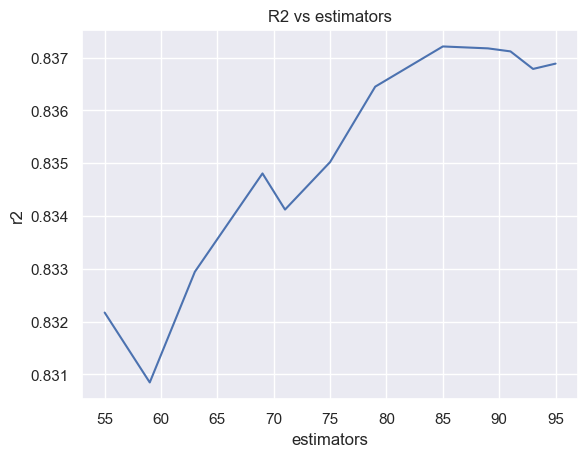

{'estimator__max_depth': 9, 'n_estimators': 85}


,R2,RMSE
Train,0.971626,13009.209230
Test,0.895159,28357.747289


In [204]:
BR =BaggingRegressor(estimator = DecisionTreeRegressor(),random_state = rs , bootstrap = True,n_jobs=-1)
BR.fit(TX_train,Ty_train)
BR.predict(TX_test)

BR_param = {'n_estimators': [55,59,63,69,71,75,79,85,89,91,93,95],
     'estimator__max_depth' : [9] }

scorer = {
    'r2' : 'r2',
    'nmse':'neg_mean_squared_error'
}
BR_search = GridSearchCV(estimator=BR, param_grid=BR_param, n_jobs=-1 , scoring=scorer, refit='r2')
BR_search.fit(TX_train,Ty_train.values.ravel())

BR_result = df_result(BR_search,
                      ['param_n_estimators','param_estimator__max_depth','mean_test_nmse','mean_test_r2'])
BR_result

print(BR_search.best_params_,BR_search.best_score_)
sns.set_theme()
plt.figure()
ax = sns.lineplot(x=BR_result['estimators'] , y = BR_result['r2'])
ax.set(title = 'R2 vs estimators',ylabel='r2')
plt.show();

best_BR = BR_search.best_estimator_
print(BR_search.best_params_)
# best_rdg_predict = best_rdg.predict(X_test)

best_BR_metric = best_model_metrics(TX_train,TX_test,Ty_train,Ty_test,best_BR)
best_BR_metric

### Random Forest Regressor

In [205]:
max_features = np.ceil(np.sqrt((TX_train.shape[1]))) #selecting feature sc sqrt(features)

RF =RandomForestRegressor()
RF.fit(TX_train,Ty_train)
RF.predict(TX_test)
print(RF.score(TX_train,Ty_train) ,RF.score(TX_test,Ty_test)  )


RF_param = {'n_estimators': [2*n+1 for n in range(50)],
             'max_depth' : [2*n+1 for n in range(10)] ,
             'max_features': [ "sqrt", "log2"],
             'warm_start' : [True,False]
            
           }

scorer = {
    'r2' : 'r2',
    'nmse':'neg_mean_squared_error'
}
#below commented result is also found from RandomizedSearchCV
# RF_search = GridSearchCV(estimator=RF, param_grid=RF_param, n_jobs=-1 , scoring=scorer, refit='nmse')
RF_search = RandomizedSearchCV(estimator=RF, param_distributions=RF_param, n_jobs=-1 , scoring=scorer, refit='nmse')

RF_search.fit(TX_train,Ty_train.values.ravel())

0.9787741834765155 0.8920531101191436


RandomizedSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15,
                                                      17, 19],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [1, 3, 5, 7, 9, 11, 13,
                                                         15, 17, 19, 21, 23, 25,
                                                         27, 29, 31, 33, 35, 37,
                                                         39, 41, 43, 45, 47, 49,
                                                         51, 53, 55, 57, 59, ...],
                                        'warm_start': [True, False]},
                   refit='nmse',
                   scoring={'nmse': 'neg_mean_squared_error', 'r2': 'r2'})

In [206]:
RF_result = df_result(RF_search,
                      ['param_n_estimators','param_max_depth','param_max_features','mean_test_nmse','mean_test_r2'])
RF_result

,estimators,depth,features,nmse,r2
0,31,7,sqrt,-1010633993.766057,0.832049
1,73,5,log2,-1267507993.484,0.79134
2,83,11,sqrt,-960371524.367266,0.84254
3,79,3,log2,-1737508879.242068,0.712099
4,97,11,sqrt,-929596776.519444,0.846475
5,99,3,sqrt,-1644350257.974208,0.728087
6,83,9,sqrt,-993728122.356461,0.836118
7,9,1,log2,-3416166824.368511,0.433634
8,19,19,log2,-1042069478.155506,0.828222
9,37,19,sqrt,-980589913.788043,0.838106


{'warm_start': True, 'n_estimators': 97, 'max_features': 'sqrt', 'max_depth': 11} -929596776.5194439


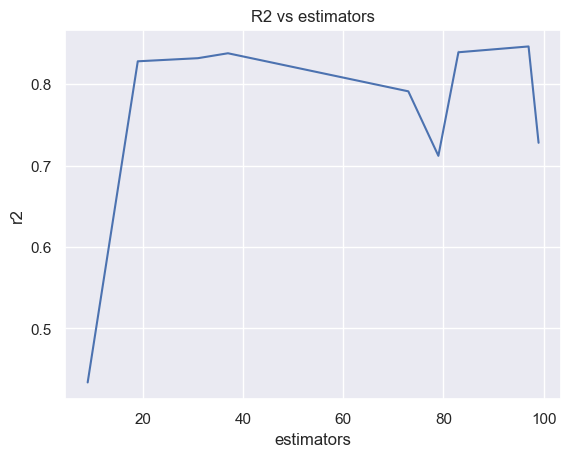

{'warm_start': True, 'n_estimators': 97, 'max_features': 'sqrt', 'max_depth': 11}


,R2,RMSE
Train,0.973394,12597.437514
Test,0.871108,31442.694636


In [207]:
print(RF_search.best_params_,RF_search.best_score_)
sns.set_theme()
plt.figure()
ax = sns.lineplot(x=RF_result['estimators'] , y = RF_result['r2'])
ax.set(title = 'R2 vs estimators',ylabel='r2')
plt.show();

best_RF = RF_search.best_estimator_
print(RF_search.best_params_)
# best_rdg_predict = best_rdg.predict(X_test)

best_RF_metric = best_model_metrics(TX_train,TX_test,Ty_train,Ty_test,best_RF)
best_RF_metric

### Extra Tree Regressor

In [208]:

ETR =ExtraTreesRegressor()
ETR.fit(TX_train,Ty_train)
ETR.predict(TX_test)
print(ETR.score(TX_train,Ty_train) ,ETR.score(TX_test,Ty_test)  )


ETR_param = {'n_estimators': [2*n+1 for n in range(30,60,1)],
             'max_depth' : [2*n+1 for n in range(5,9,1)] ,
             'max_features': [ "sqrt", "log2"],
             'warm_start' : [True,False],
             'bootstrap'  : [True,False]
            
           }

scorer = {
    'r2' : 'r2',
    'nmse':'neg_mean_squared_error'
}

ETR_search = RandomizedSearchCV(estimator=ETR, param_distributions=ETR_param, n_jobs=-1 , scoring=scorer, refit='r2')

ETR_search.fit(TX_train,Ty_train.values.ravel())
ETR_result = df_result(ETR_search,
                      ['param_bootstrap','param_n_estimators','param_max_depth',
                       'param_max_features','mean_test_nmse','mean_test_r2'])
ETR_result

1.0 0.8817146848193423


,bootstrap,estimators,depth,features,nmse,r2
0,True,79,13,sqrt,-1030947099.790934,0.830565
1,False,95,13,sqrt,-981968126.375968,0.838742
2,True,113,13,sqrt,-1008718890.90123,0.833663
3,False,75,13,log2,-1026788804.45205,0.830968
4,True,111,13,sqrt,-1007448808.884872,0.834724
5,True,117,11,log2,-1097879590.501935,0.819313
6,True,95,17,log2,-1013796895.830634,0.833042
7,True,81,15,log2,-1029748547.656787,0.830826
8,True,81,17,log2,-1042095399.560824,0.827892
9,True,119,15,log2,-1048869313.123524,0.827893


{'warm_start': False, 'n_estimators': 95, 'max_features': 'sqrt', 'max_depth': 13, 'bootstrap': False} 0.838742219929809


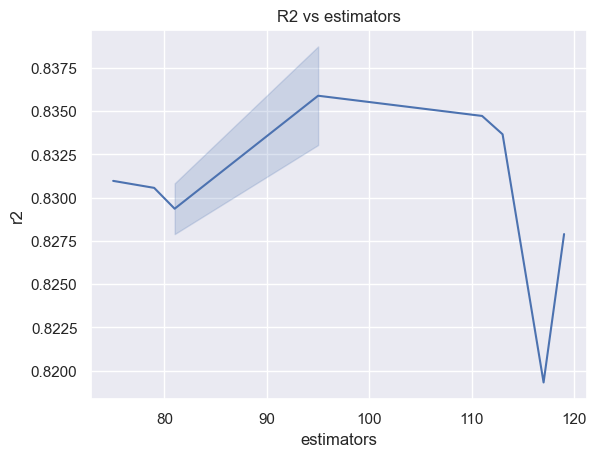

{'warm_start': False, 'n_estimators': 95, 'max_features': 'sqrt', 'max_depth': 13, 'bootstrap': False}


,R2,RMSE
Train,0.990008,7720.068288
Test,0.858272,32971.190021


In [209]:
print(ETR_search.best_params_,ETR_search.best_score_)
sns.set_theme()
plt.figure()
ax = sns.lineplot(x=ETR_result['estimators'] , y = ETR_result['r2'])
ax.set(title = 'R2 vs estimators',ylabel='r2')
plt.show();

best_ETR = ETR_search.best_estimator_
#below commented result is also found from RandomizedSearchCV
#{'warm_start': True, 'n_estimators': 169, 'max_features': 'sqrt', 'max_depth': 19, 'bootstrap': False}
#{'warm_start': False, 'n_estimators': 101, 'max_features': 'sqrt', 'max_depth': 15, 'bootstrap': False} 0.8404225977925212
print(ETR_search.best_params_)
# best_rdg_predict = best_rdg.predict(X_test)

best_ETR_metric = best_model_metrics(TX_train,TX_test,Ty_train,Ty_test,best_ETR)
best_ETR_metric

## Summary of Models

In [210]:
models = [lr,best_rdg,best_las,best_enet,best_svr]
models2 =[best_DT,best_BR,best_RF,best_ETR]

This plot is for train set of LinearRegression() 



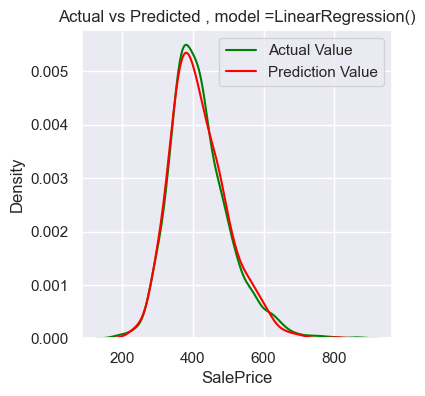

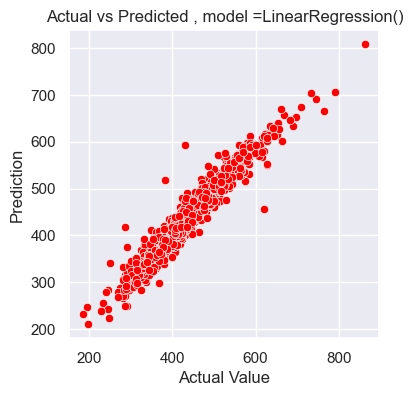




This plot is for Test set of LinearRegression() 



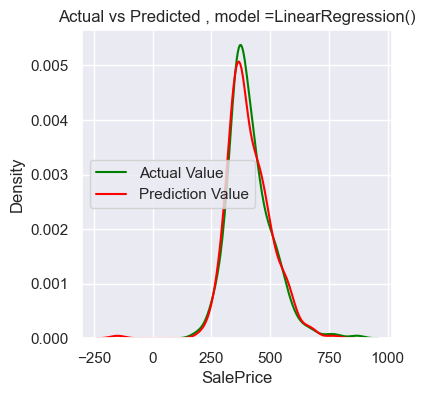

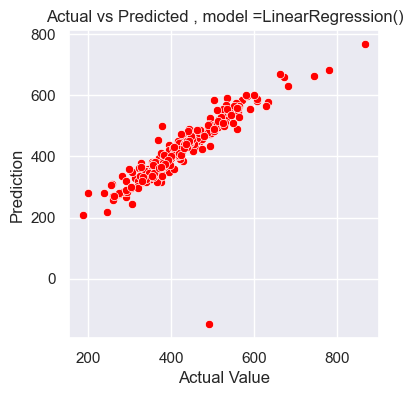

This plot is for train set of Pipeline(steps=[('polyfeat', PolynomialFeatures()), ('ss', StandardScaler()),
                ('model', Ridge(alpha=6925, max_iter=10000, random_state=42))]) 



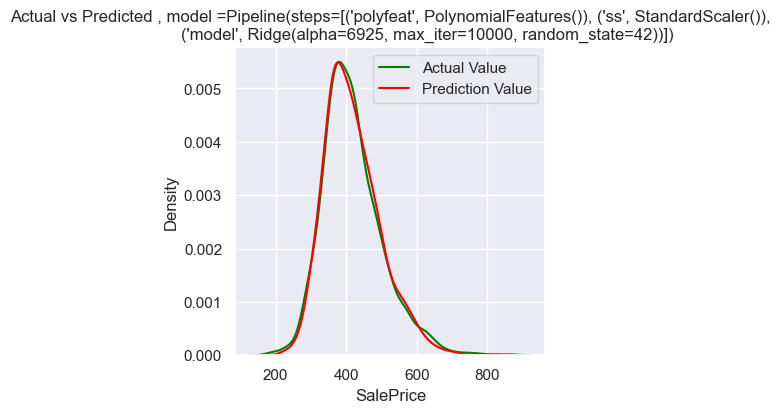

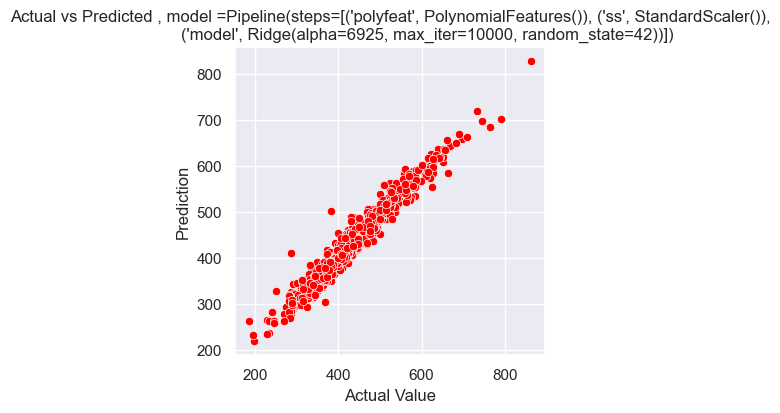




This plot is for Test set of Pipeline(steps=[('polyfeat', PolynomialFeatures()), ('ss', StandardScaler()),
                ('model', Ridge(alpha=6925, max_iter=10000, random_state=42))]) 



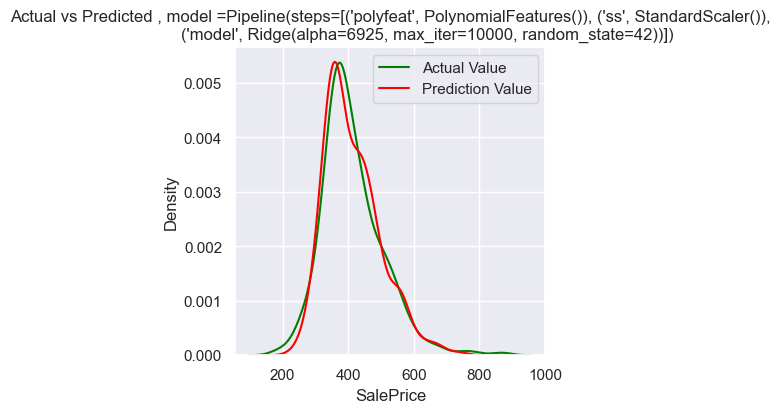

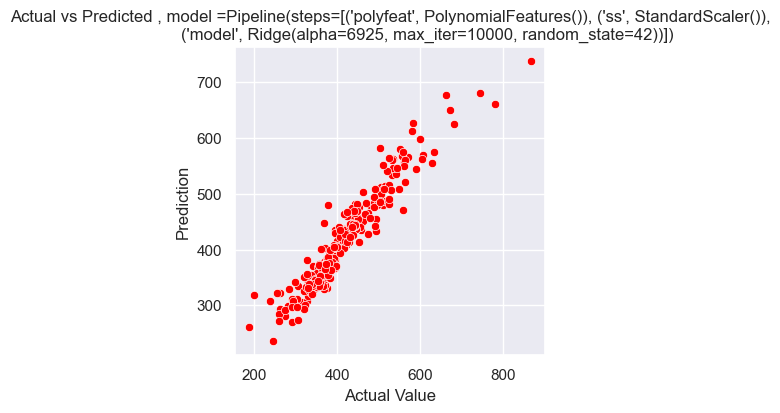

This plot is for train set of Pipeline(steps=[('polyfeat', PolynomialFeatures(degree=1)),
                ('ss', StandardScaler()),
                ('model', Lasso(alpha=1.4, max_iter=10000, random_state=42))]) 



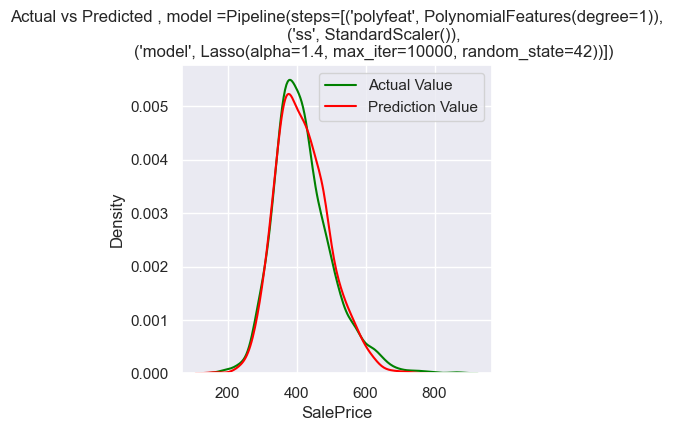

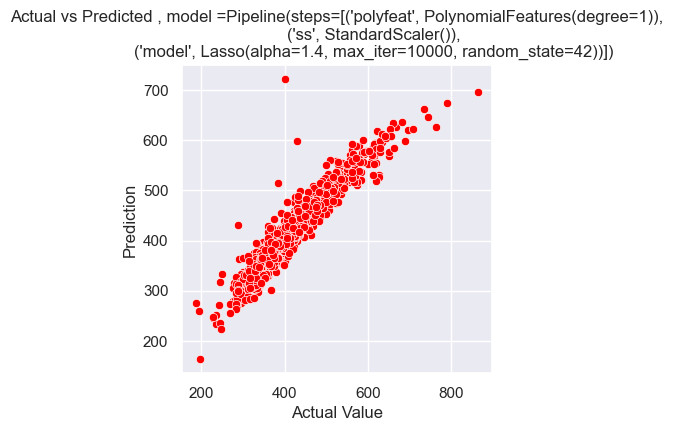




This plot is for Test set of Pipeline(steps=[('polyfeat', PolynomialFeatures(degree=1)),
                ('ss', StandardScaler()),
                ('model', Lasso(alpha=1.4, max_iter=10000, random_state=42))]) 



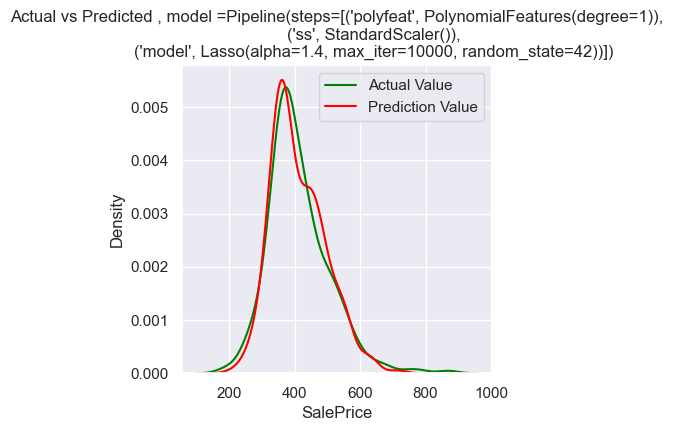

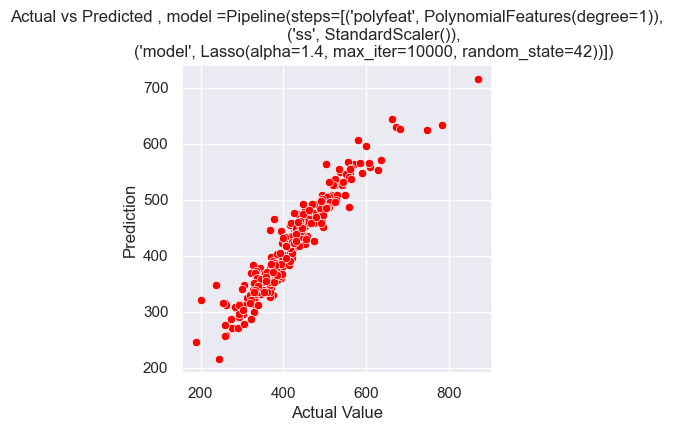

This plot is for train set of Pipeline(steps=[('polyfeat', PolynomialFeatures(degree=1)),
                ('ss', StandardScaler()),
                ('model',
                 ElasticNet(alpha=1.065, l1_ratio=0.78, max_iter=10000,
                            random_state=42))]) 



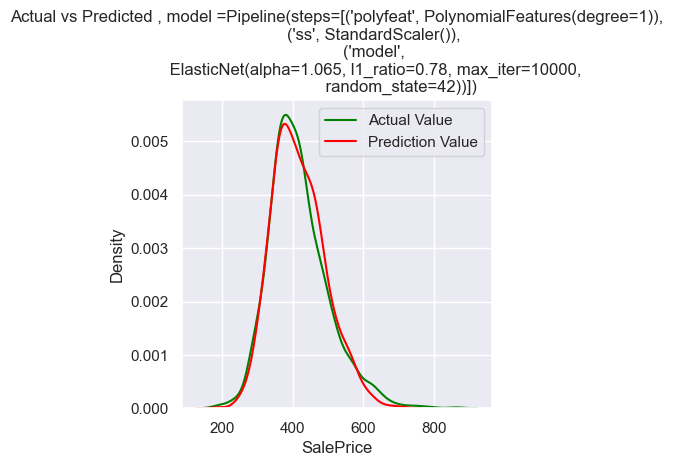

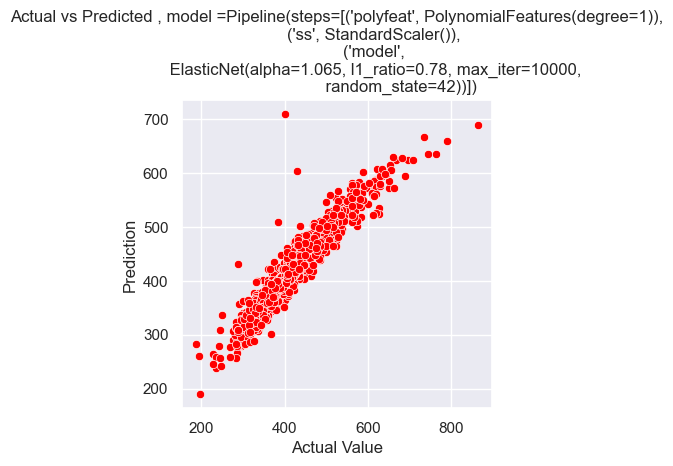




This plot is for Test set of Pipeline(steps=[('polyfeat', PolynomialFeatures(degree=1)),
                ('ss', StandardScaler()),
                ('model',
                 ElasticNet(alpha=1.065, l1_ratio=0.78, max_iter=10000,
                            random_state=42))]) 



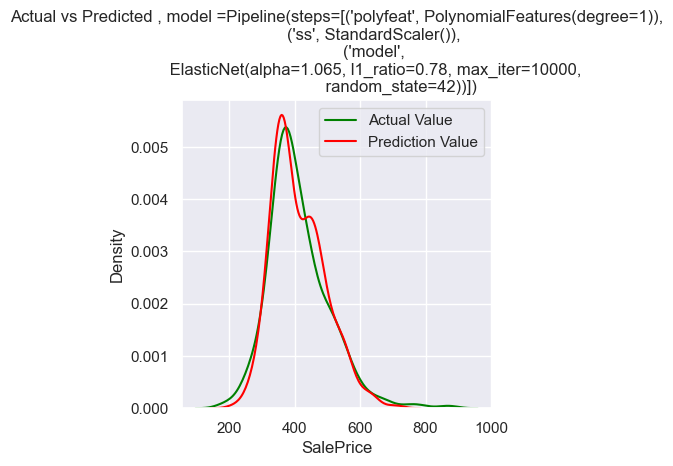

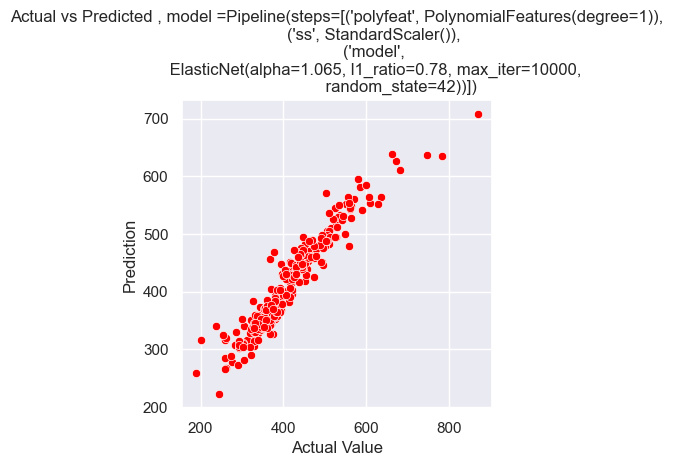

This plot is for train set of Pipeline(steps=[('polyfeat', PolynomialFeatures(degree=1)),
                ('ss', StandardScaler()),
                ('model', LinearSVR(C=1.695, max_iter=10000, random_state=42))]) 



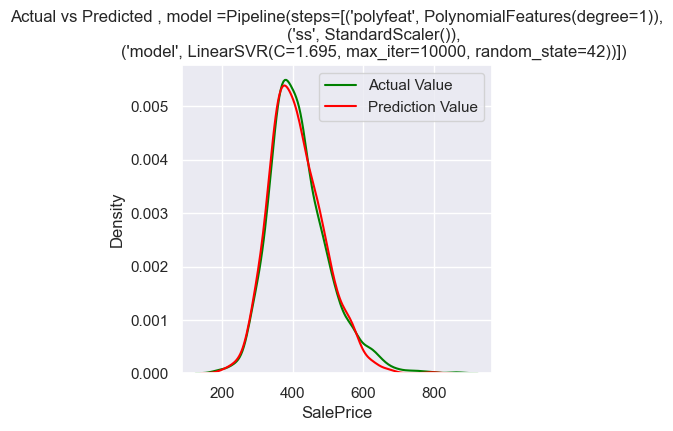

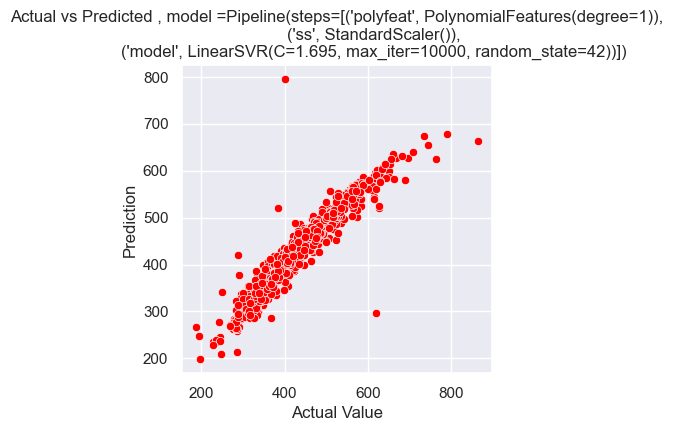




This plot is for Test set of Pipeline(steps=[('polyfeat', PolynomialFeatures(degree=1)),
                ('ss', StandardScaler()),
                ('model', LinearSVR(C=1.695, max_iter=10000, random_state=42))]) 



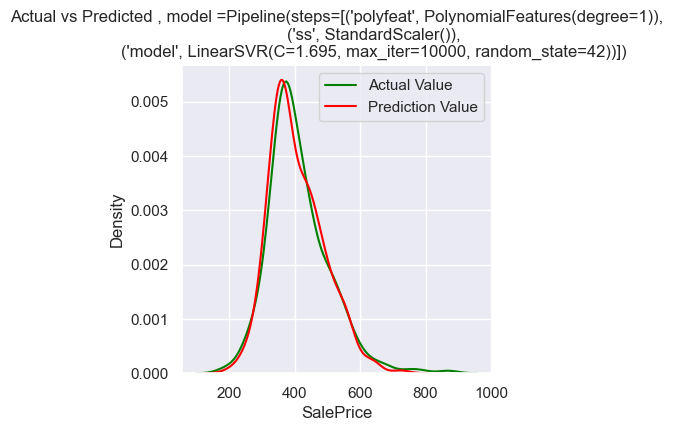

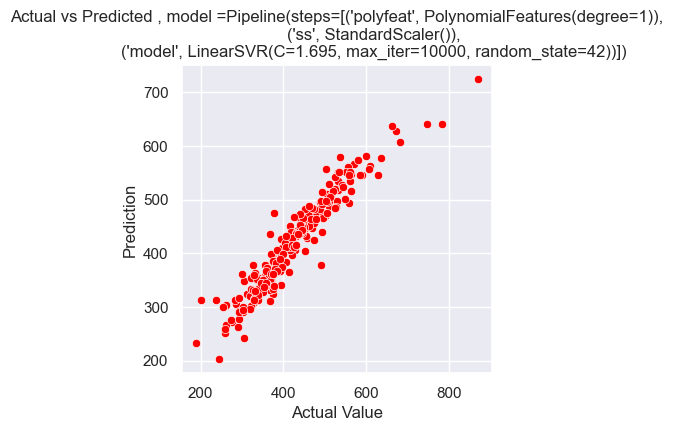

In [211]:
for model in models:
    print(f'This plot is for train set of {model} \n')
    prediction_dist(y_train,model.predict(X_train),model)
    prediction_scatter(y_train,model.predict(X_train),model)

    print(f'\n\n\nThis plot is for Test set of {model} \n')
    
    prediction_dist(y_test,model.predict(X_test),model)
    prediction_scatter(y_test,model.predict(X_test),model)

This plot is for train set of DecisionTreeRegressor(max_depth=20, min_samples_leaf=5, min_samples_split=20,
                      random_state=42) 



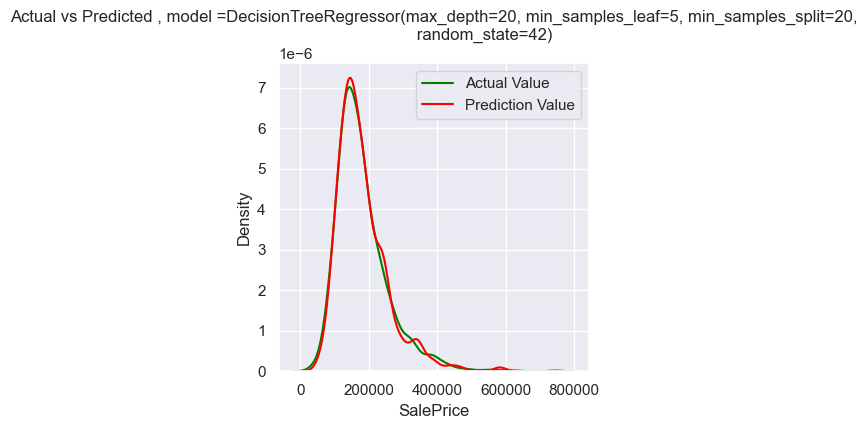

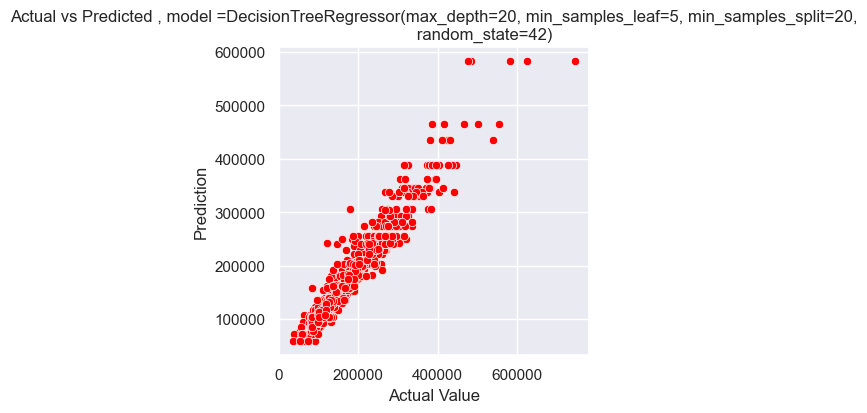




This plot is for Test set of DecisionTreeRegressor(max_depth=20, min_samples_leaf=5, min_samples_split=20,
                      random_state=42) 



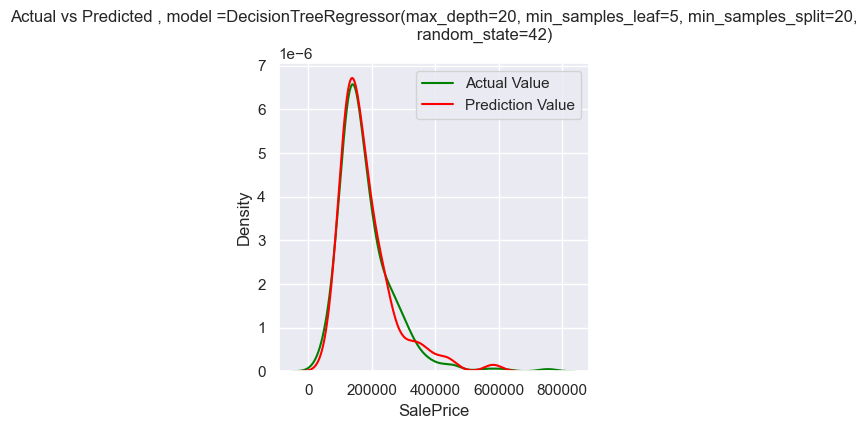

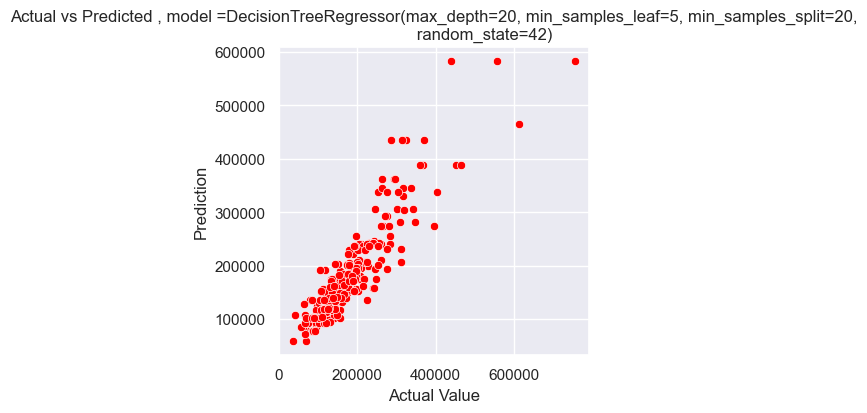

This plot is for train set of BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=9), n_estimators=85,
                 n_jobs=-1, random_state=42) 



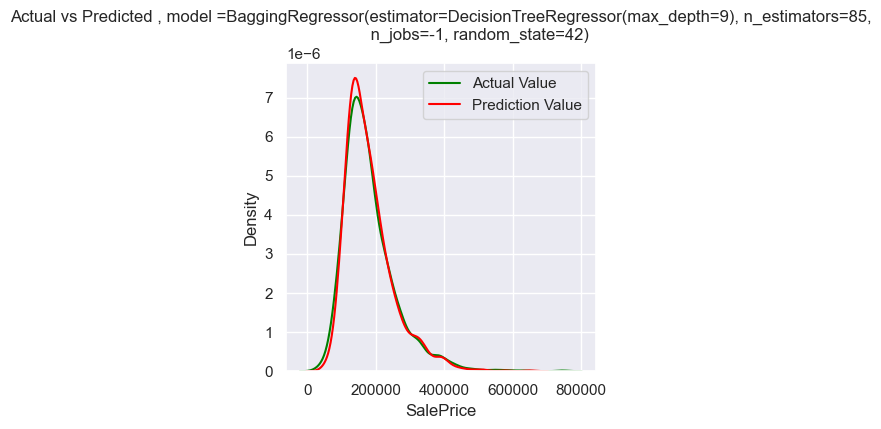

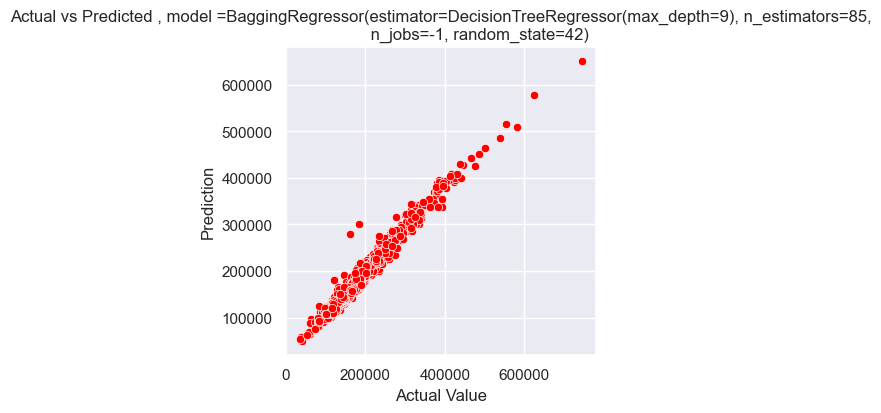




This plot is for Test set of BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=9), n_estimators=85,
                 n_jobs=-1, random_state=42) 



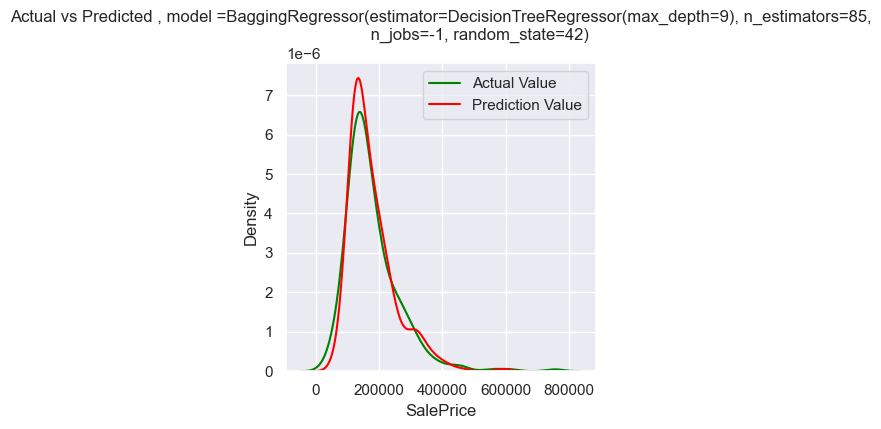

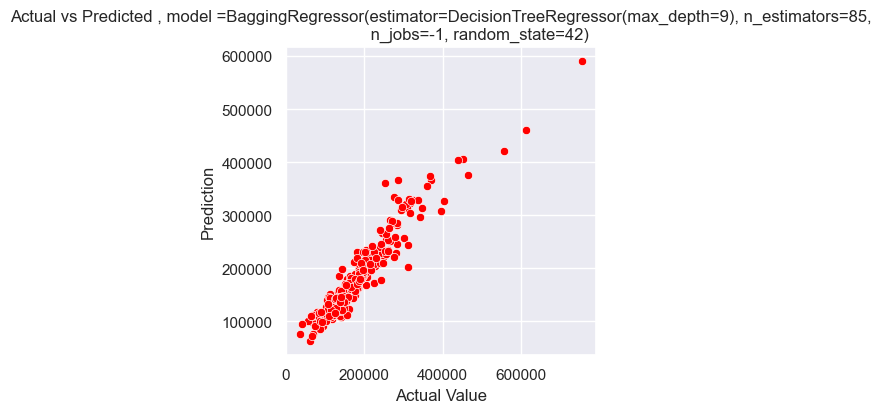

This plot is for train set of RandomForestRegressor(max_depth=11, max_features='sqrt', n_estimators=97,
                      warm_start=True) 



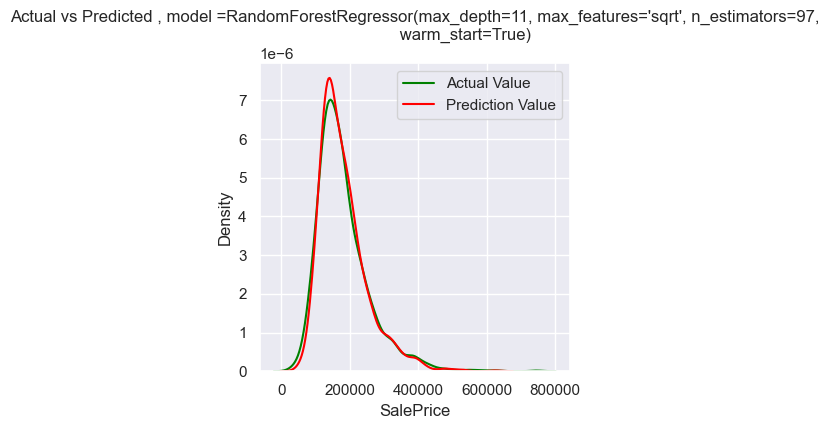

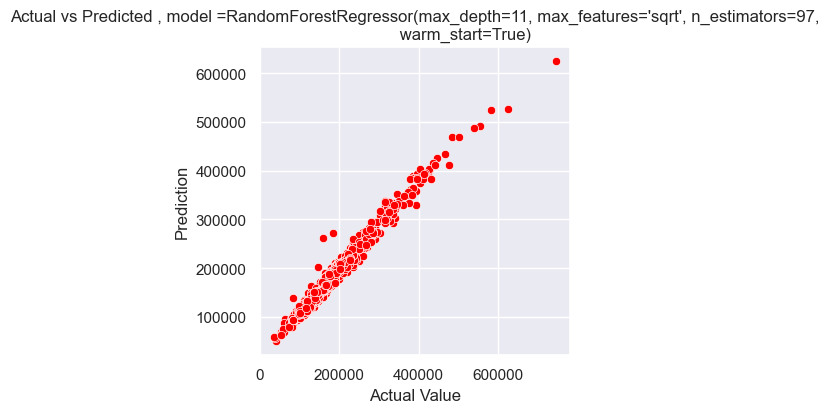




This plot is for Test set of RandomForestRegressor(max_depth=11, max_features='sqrt', n_estimators=97,
                      warm_start=True) 



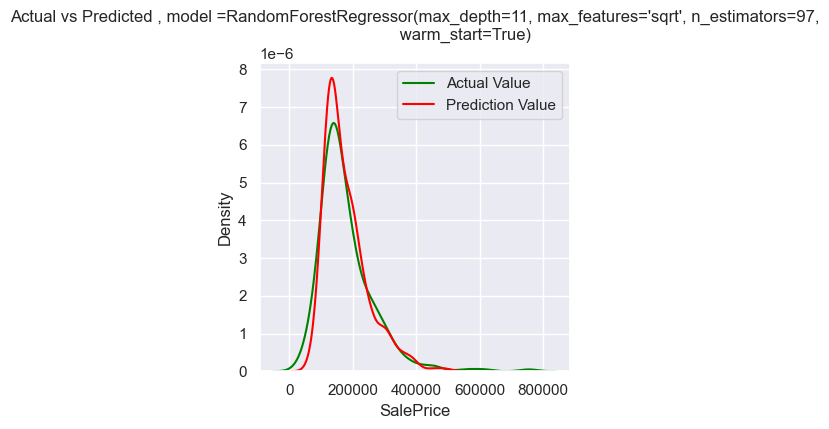

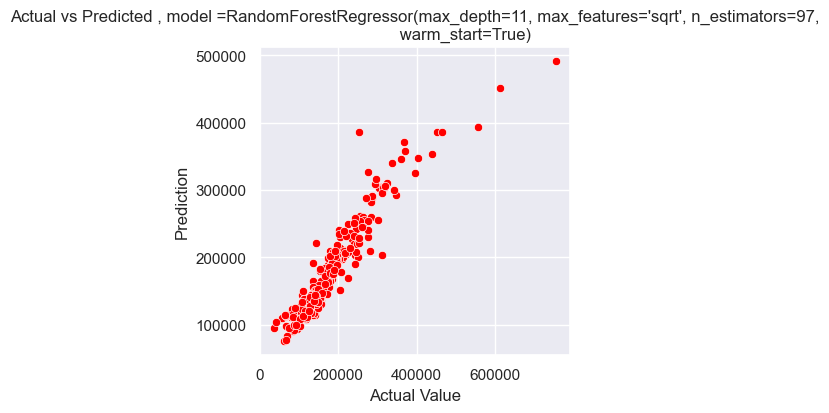

This plot is for train set of ExtraTreesRegressor(max_depth=13, max_features='sqrt', n_estimators=95) 



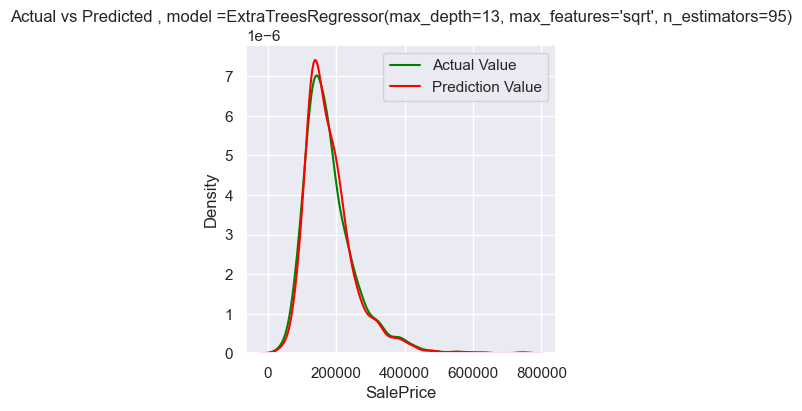

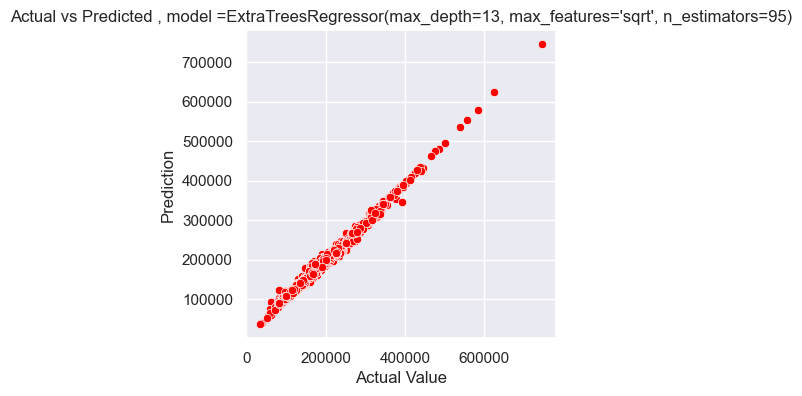




This plot is for Test set of ExtraTreesRegressor(max_depth=13, max_features='sqrt', n_estimators=95) 



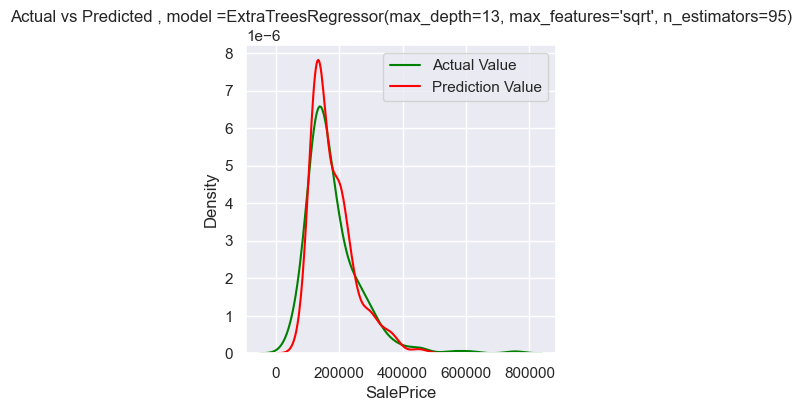

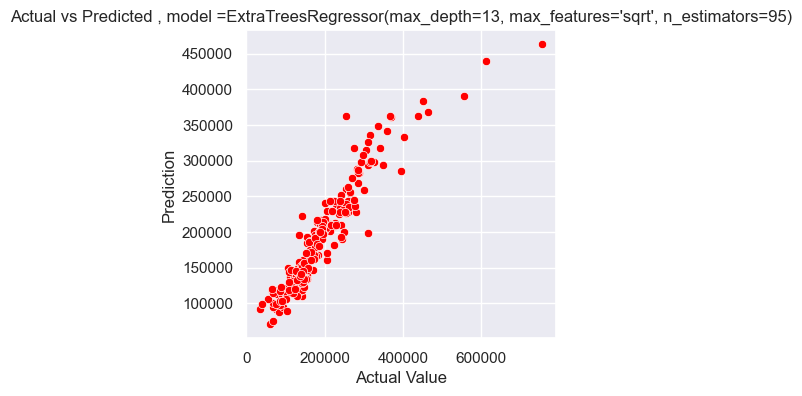

In [212]:
for model in models2:
    print(f'This plot is for train set of {model} \n')
    prediction_dist(Ty_train,model.predict(TX_train),model)
    prediction_scatter(Ty_train,model.predict(TX_train),model)

    print(f'\n\n\nThis plot is for Test set of {model} \n')
    
    prediction_dist(Ty_test,model.predict(TX_test),model)
    prediction_scatter(Ty_test,model.predict(TX_test),model)

In [213]:
str(lr_metric)

'             R2       RMSE\nTrain  0.938311  20.830790\nTest   0.758487  45.575209'

In [214]:
### bar plot of R2 and RMSE of Each model
models_mat1 = [lr_metric,best_rdg_metric,best_las_metric,best_enet_metric,best_svr_metric]
label1 = ['lr','best_rdg','best_las','best_enet','best_svr']

models_mat2 = [best_DT_metric,best_BR_metric,best_RF_metric,best_ETR_metric]
label2 = ['best_DT','best_BR','best_RF','best_ETR']

## for model_mat1
r2_train1 = [data.loc['Train' ,'R2'] for data in models_mat1]
r2_test1 = [data.loc['Test' ,'R2'] for data in models_mat1]
rmse_train1 = [data.loc['Train' ,'RMSE'] for data in models_mat1]
rmse_test1 = [data.loc['Test' ,'RMSE'] for data in models_mat1]

## for model_mat2
r2_train2 = [data.loc['Train' ,'R2'] for data in models_mat2]
r2_test2 = [data.loc['Test' ,'R2'] for data in models_mat2]
rmse_train2 = [data.loc['Train' ,'RMSE'] for data in models_mat2]
rmse_test2 = [data.loc['Test' ,'RMSE'] for data in models_mat2]

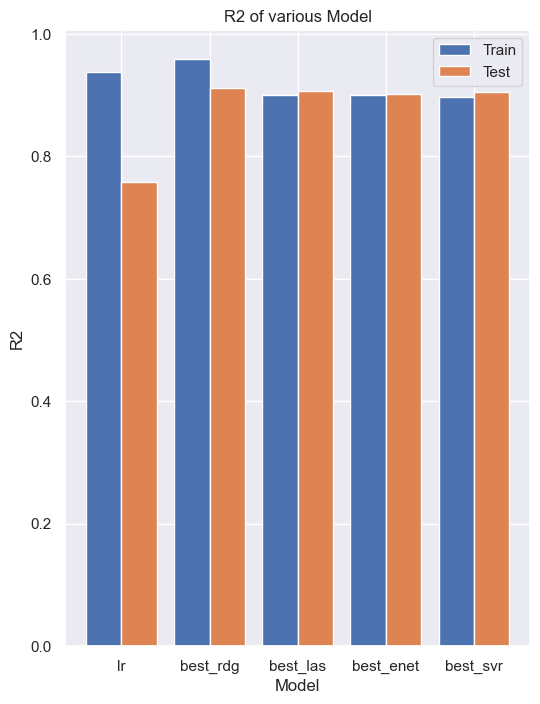

In [215]:
# bar plot for R2 of model

plt.figure(figsize=(6,8))
plt.bar(x = label1, height=r2_train1,width= -0.4,align = 'edge', label = 'Train')
plt.bar(x = label1 , height= r2_test1,width= 0.4,align = 'edge', label = 'Test')
plt.legend()
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('R2 of various Model')
plt.show()

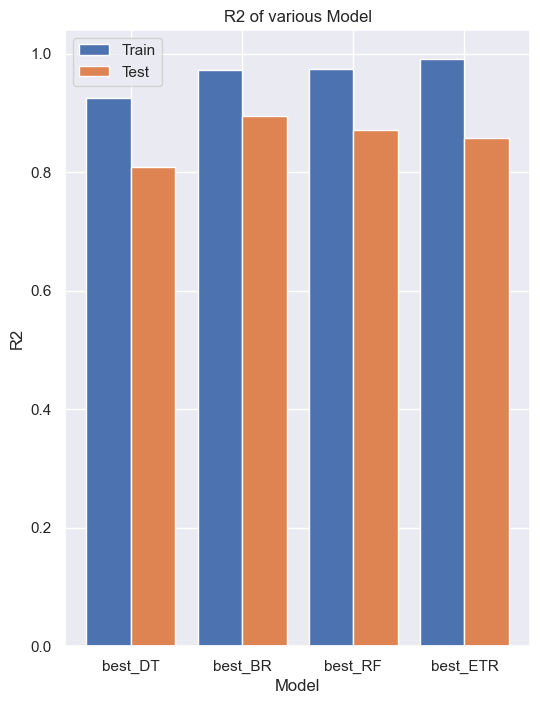

In [216]:
# bar plot for R2 of model

plt.figure(figsize=(6,8))
plt.bar(x = label2, height=r2_train2,width= -0.4,align = 'edge', label = 'Train')
plt.bar(x = label2 , height= r2_test2,width= 0.4,align = 'edge', label = 'Test')
plt.legend()
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('R2 of various Model')
plt.show()

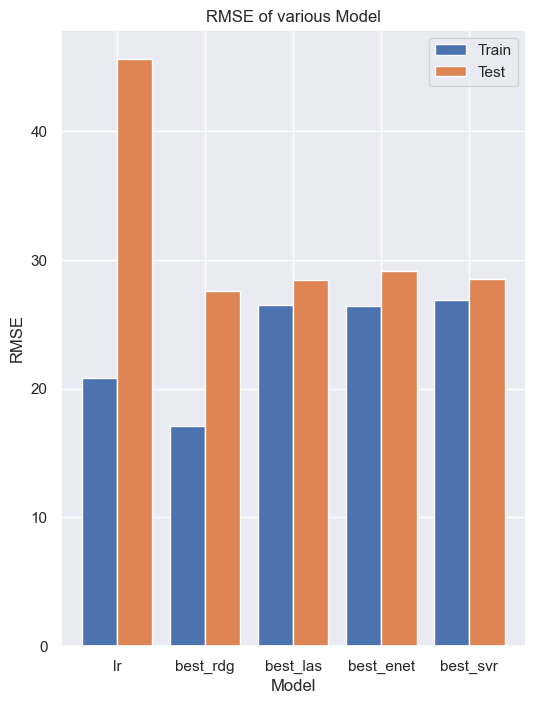

In [217]:
# bar plot for RMSE of model

plt.figure(figsize=(6,8))
plt.bar(x = label1, height=rmse_train1,width= -0.4,align = 'edge', label = 'Train')
plt.bar(x = label1 , height= rmse_test1,width= 0.4,align = 'edge', label = 'Test')
plt.legend()
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE of various Model')
plt.show()

`RMSE` in above plot is lower for all model because Target variable  `SalePrice` was transformed by `sqrt` for all model in above plot. so `RMSE` is for `sqrt Transformed ``(SalePrice)`

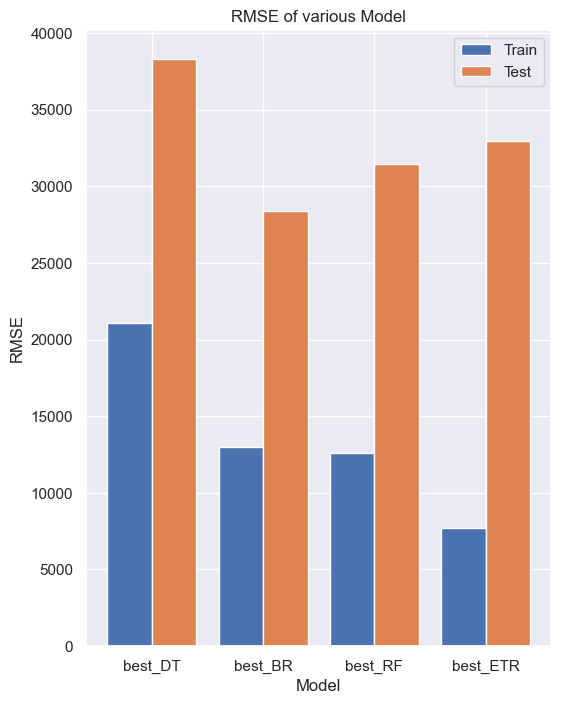

In [218]:
# bar plot for R2 of model

plt.figure(figsize=(6,8))
plt.bar(x = label2, height=rmse_train2,width= -0.4,align = 'edge', label = 'Train')
plt.bar(x = label2 , height= rmse_test2,width= 0.4,align = 'edge', label = 'Test')
plt.legend()
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE of various Model')
plt.show()

## Conclusion

* For Non Tree based Model, all except `lr`, performs well on fine-tuning of parameters.

* Tree based models fit well on train set but slightly overfit on Test set.
`best_BR` seems to prform well compare to other Tree based models. however there is very minimum difference in matrics is observed.